Part I: Data Preparing
----

1. Checked the NaN value
2. Made Scatter Plots 
    * 2.1. Income vs Credit_Score, 
    * 2.2. Age vs Credit_Score,
    * 2.3. Income vs Dependents,
    * 2.4. Age vs Dependents,
3. Made Data Summary


In [140]:
# Importing necessary libraries
import pandas as pd

# Defining the file path
file_path = r'Data/loan_default_prediction.csv'

# Loading the data into a DataFrame
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()


age     income  credit_score  dependents  home_owner  loan_default
0   64  100000.00           583           3           0             0
1   45   16803.24           685           4           0             0
2   69   15418.51           498           2           0             0
3   63   11474.46           533           4           0             0
4   46   11536.00           454           0           1             0

In [141]:
# Summary of data types
data_types = data.dtypes

# Summary of ranges (min and max values) for numerical columns
ranges = data.describe().loc[['min', 'max']]

# Combining data types and ranges into one summary
summary = pd.DataFrame(data_types, columns=['Data Type'])
summary['Min Value'] = ranges.loc['min']
summary['Max Value'] = ranges.loc['max']

# Display the summary
print(summary)


             Data Type  Min Value  Max Value
age              int64       20.0       69.0
income         float64     4000.0   100000.0
credit_score     int64      300.0      849.0
dependents       int64        0.0        4.0
home_owner       int64        0.0        1.0
loan_default     int64        0.0        1.0


In [142]:
# Calculate central tendency and dispersion
summary_stats = data.describe().T  # Transpose for better readability

# Adding the median to the summary statistics
summary_stats['median'] = data.median()

# Renaming columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    'max': 'Maximum',
    '50%': 'Median (50th Percentile)'
})

# Display the summary
print(summary_stats[['Mean', 'Median (50th Percentile)', 'Standard Deviation', 'Minimum', 'Maximum']])


                     Mean  Median (50th Percentile)  Standard Deviation  \
age              44.55200                     44.00           14.338231   
income        30496.36997                  20284.82        27265.987560   
credit_score    580.03800                    586.50          158.897083   
dependents        1.92900                      2.00            1.433183   
home_owner        0.47600                      0.00            0.499674   
loan_default      0.19500                      0.00            0.396399   

              Minimum   Maximum  
age              20.0      69.0  
income         4000.0  100000.0  
credit_score    300.0     849.0  
dependents        0.0       4.0  
home_owner        0.0       1.0  
loan_default      0.0       1.0  


In [143]:
import pandas as pd

# loan_default class and numbers of datapoints in each class
class_counts = data['loan_default'].value_counts()

# Print the results
print("Loan Default Categories Count:")
print(f"0 (Not Default): {class_counts.get(0, 0)}")
print(f"1 (Default): {class_counts.get(1, 0)}")


Loan Default Categories Count:
0 (Not Default): 805
1 (Default): 195


In [144]:
# Checking for missing values in the dataset
print("Number of NaN values before cleaning:\n", data.isnull().sum())

# Removing rows with any NaN values
data_cleaned = data.dropna()

# Checking again for missing values to confirm
print("Number of NaN values after cleaning:\n", data_cleaned.isnull().sum())

# Saving the cleaned data back to the original file
data_cleaned.to_csv(file_path, index=False)

print("Data cleaning completed. Changes have been saved to the file.")


Number of NaN values before cleaning:
 age             0
income          0
credit_score    0
dependents      0
home_owner      0
loan_default    0
dtype: int64
Number of NaN values after cleaning:
 age             0
income          0
credit_score    0
dependents      0
home_owner      0
loan_default    0
dtype: int64
Data cleaning completed. Changes have been saved to the file.


2D Scatter Plot
----

Experimented with:

* Income vs Credit Score
* Age vs Credit Score
* Income vs Dependents
* Age vs Dependents
* All Features as input features

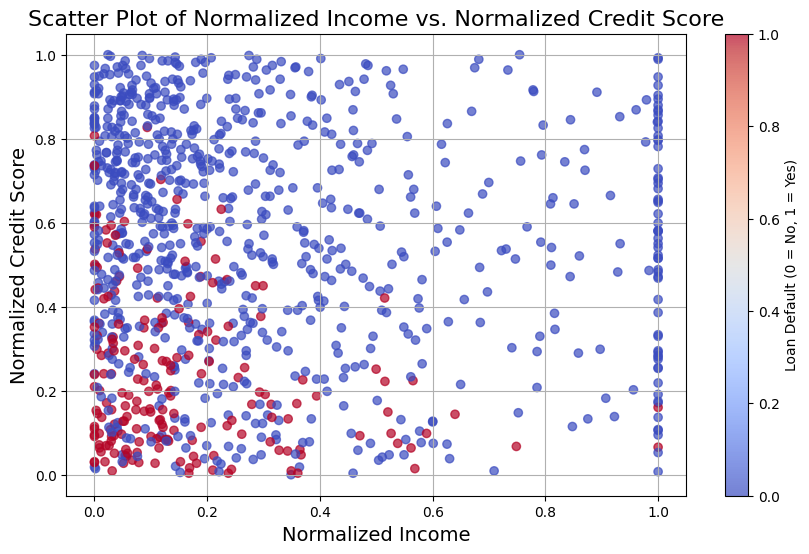

In [145]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Selecting the columns to normalize
columns_to_normalize = ['income', 'credit_score']

# Normalizing the selected columns
data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])

# Scatter plot of normalized income vs. normalized credit_score, colored by loan_default
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_cleaned['income'], 
                      data_cleaned['credit_score'], 
                      c=data_cleaned['loan_default'], 
                      cmap='coolwarm', 
                      alpha=0.7)

# Adding labels and title
plt.colorbar(scatter, label='Loan Default (0 = No, 1 = Yes)')
plt.title('Scatter Plot of Normalized Income vs. Normalized Credit Score', fontsize=16)
plt.xlabel('Normalized Income', fontsize=14)
plt.ylabel('Normalized Credit Score', fontsize=14)

# Displaying the plot
plt.grid(True)
plt.show()


From the Income vs Credit Score Scatter Plot, we can see that:

There is not a clean seperation, but there seems to be a pattern:
1. People with lower income and lower credit scores are more likely to default their loans
2. People with lower income, but higher credit scores are less likely to default their loans
3. People with higher income and lower credit scores rarely default their loans
4. People with higher income and higher credit scores, never default their loans

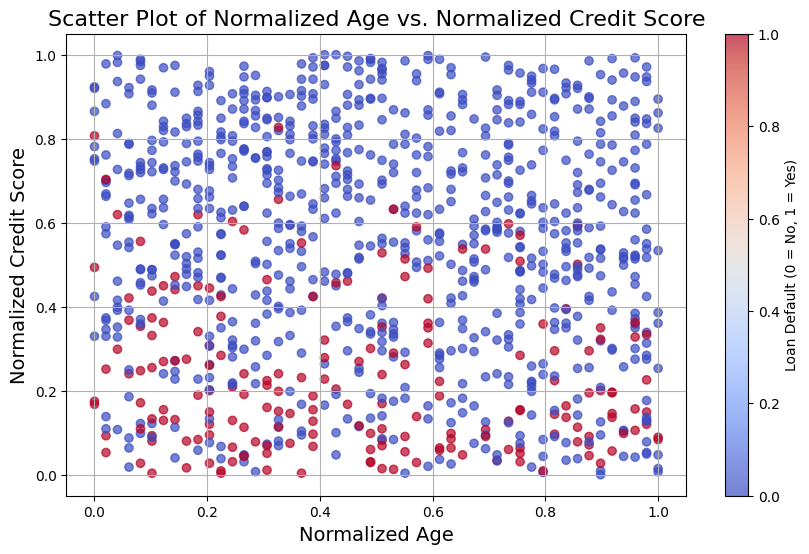

In [146]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Selecting the columns to normalize
columns_to_normalize = ['age', 'credit_score']

# Normalizing the selected columns
data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])

# Scatter plot of normalized age vs. normalized credit_score, colored by loan_default
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_cleaned['age'], 
                      data_cleaned['credit_score'], 
                      c=data_cleaned['loan_default'], 
                      cmap='coolwarm', 
                      alpha=0.7)

# Adding labels and title
plt.colorbar(scatter, label='Loan Default (0 = No, 1 = Yes)')  # Color bar for loan default
plt.title('Scatter Plot of Normalized Age vs. Normalized Credit Score', fontsize=16)  # Title of the plot
plt.xlabel('Normalized Age', fontsize=14)  # Label for x-axis
plt.ylabel('Normalized Credit Score', fontsize=14)  # Label for y-axis

# Displaying the plot
plt.grid(True)  # Adding a grid for better readability
plt.show()

From the Age vs Credit Score Scatter Plot we can see:

1. There seems to be a rather even distribution of age amoung defaulted loans
2. People with lower credit scres are more likely to default their loans

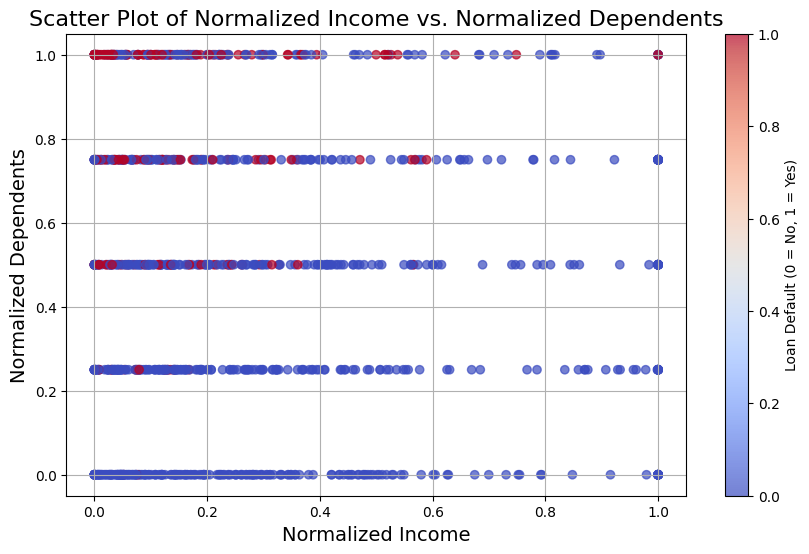

In [147]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Selecting the columns to normalize
columns_to_normalize = ['income', 'dependents']

# Normalizing the selected columns
data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])

# Scatter plot of normalized income vs. normalized dependents, colored by loan_default
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_cleaned['income'], 
                      data_cleaned['dependents'], 
                      c=data_cleaned['loan_default'], 
                      cmap='coolwarm', 
                      alpha=0.7)

# Adding labels and title
plt.colorbar(scatter, label='Loan Default (0 = No, 1 = Yes)')  # Color bar for loan default
plt.title('Scatter Plot of Normalized Income vs. Normalized Dependents', fontsize=16)  # Title of the plot
plt.xlabel('Normalized Income', fontsize=14)  # Label for x-axis
plt.ylabel('Normalized Dependents', fontsize=14)  # Label for y-axis

# Displaying the plot
plt.grid(True)  # Adding a grid for better readability
plt.show()


From the Income vs Dependents Scater Plot we can see that:

1. People with more dependents and less income are more likely to default their loans
2. Peole with higher income and less dependents are less likely to default their loans

PS: I don't know if I made a mistake with Normalization of the data or it is because  the number of data point is too small


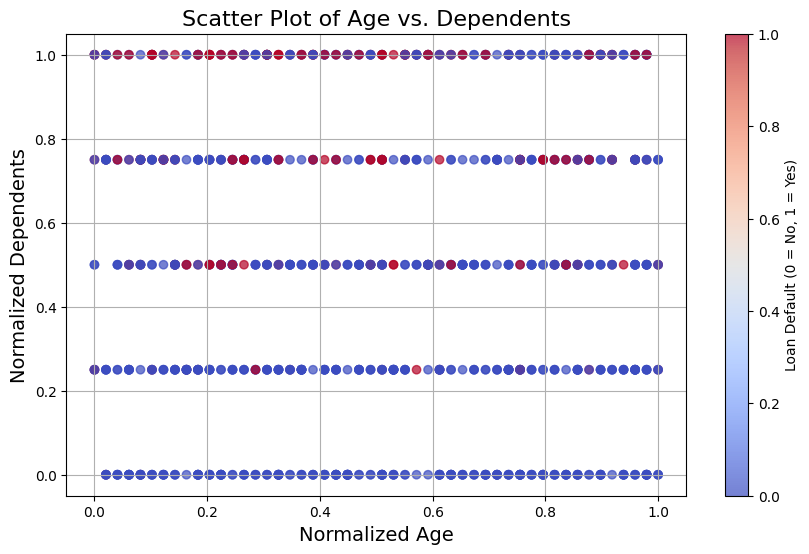

In [148]:
# Scatter plot of age vs. dependents, colored by loan_default
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_cleaned['age'], 
                      data_cleaned['dependents'], 
                      c=data_cleaned['loan_default'], 
                      cmap='coolwarm', 
                      alpha=0.7)

# Adding labels and title
plt.colorbar(scatter, label='Loan Default (0 = No, 1 = Yes)')  # Color bar for loan default
plt.title('Scatter Plot of Age vs. Dependents', fontsize=16)  # Title of the plot
plt.xlabel('Normalized Age', fontsize=14)  # Label for x-axis
plt.ylabel('Normalized Dependents', fontsize=14)  # Label for y-axis

# Displaying the plot
plt.grid(True)  # Adding a grid for better readability
plt.show()

From the Age vs Dependents Scatter Plot we can find that:

1. The age doesn't seem to be the factor for loan default
2. People with more dependents are more likely to default.

Histogram
---

* Loan Default and Non-Default Data Summary
* Data Summary of the Whole Dataset

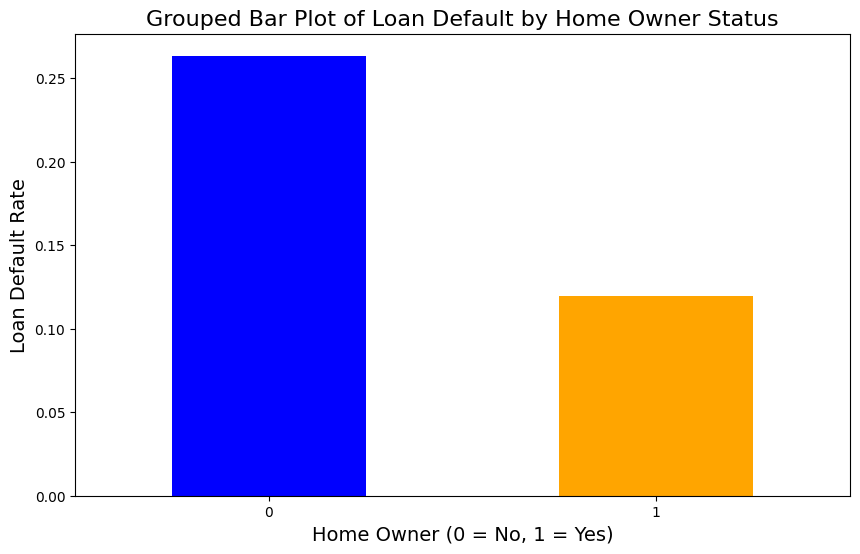

In [149]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Creating a grouped bar plot for boolean variables like 'home_owner'
plt.figure(figsize=(10, 6))

# Grouping by 'home_owner' and calculating the mean of 'loan_default' for each group
home_owner_grouped = data_cleaned.groupby('home_owner')['loan_default'].mean()

# Plotting the grouped bar chart
home_owner_grouped.plot(kind='bar', color=['blue', 'orange'])

# Adding labels and title
plt.title('Grouped Bar Plot of Loan Default by Home Owner Status', fontsize=16)
plt.xlabel('Home Owner (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Loan Default Rate', fontsize=14)

# Displaying the plot
plt.xticks(rotation=0)
plt.show()


From the Home Owner vs Non-Home Owner Default rate we can find that:

Non-Home Owners are more likely to default their loans

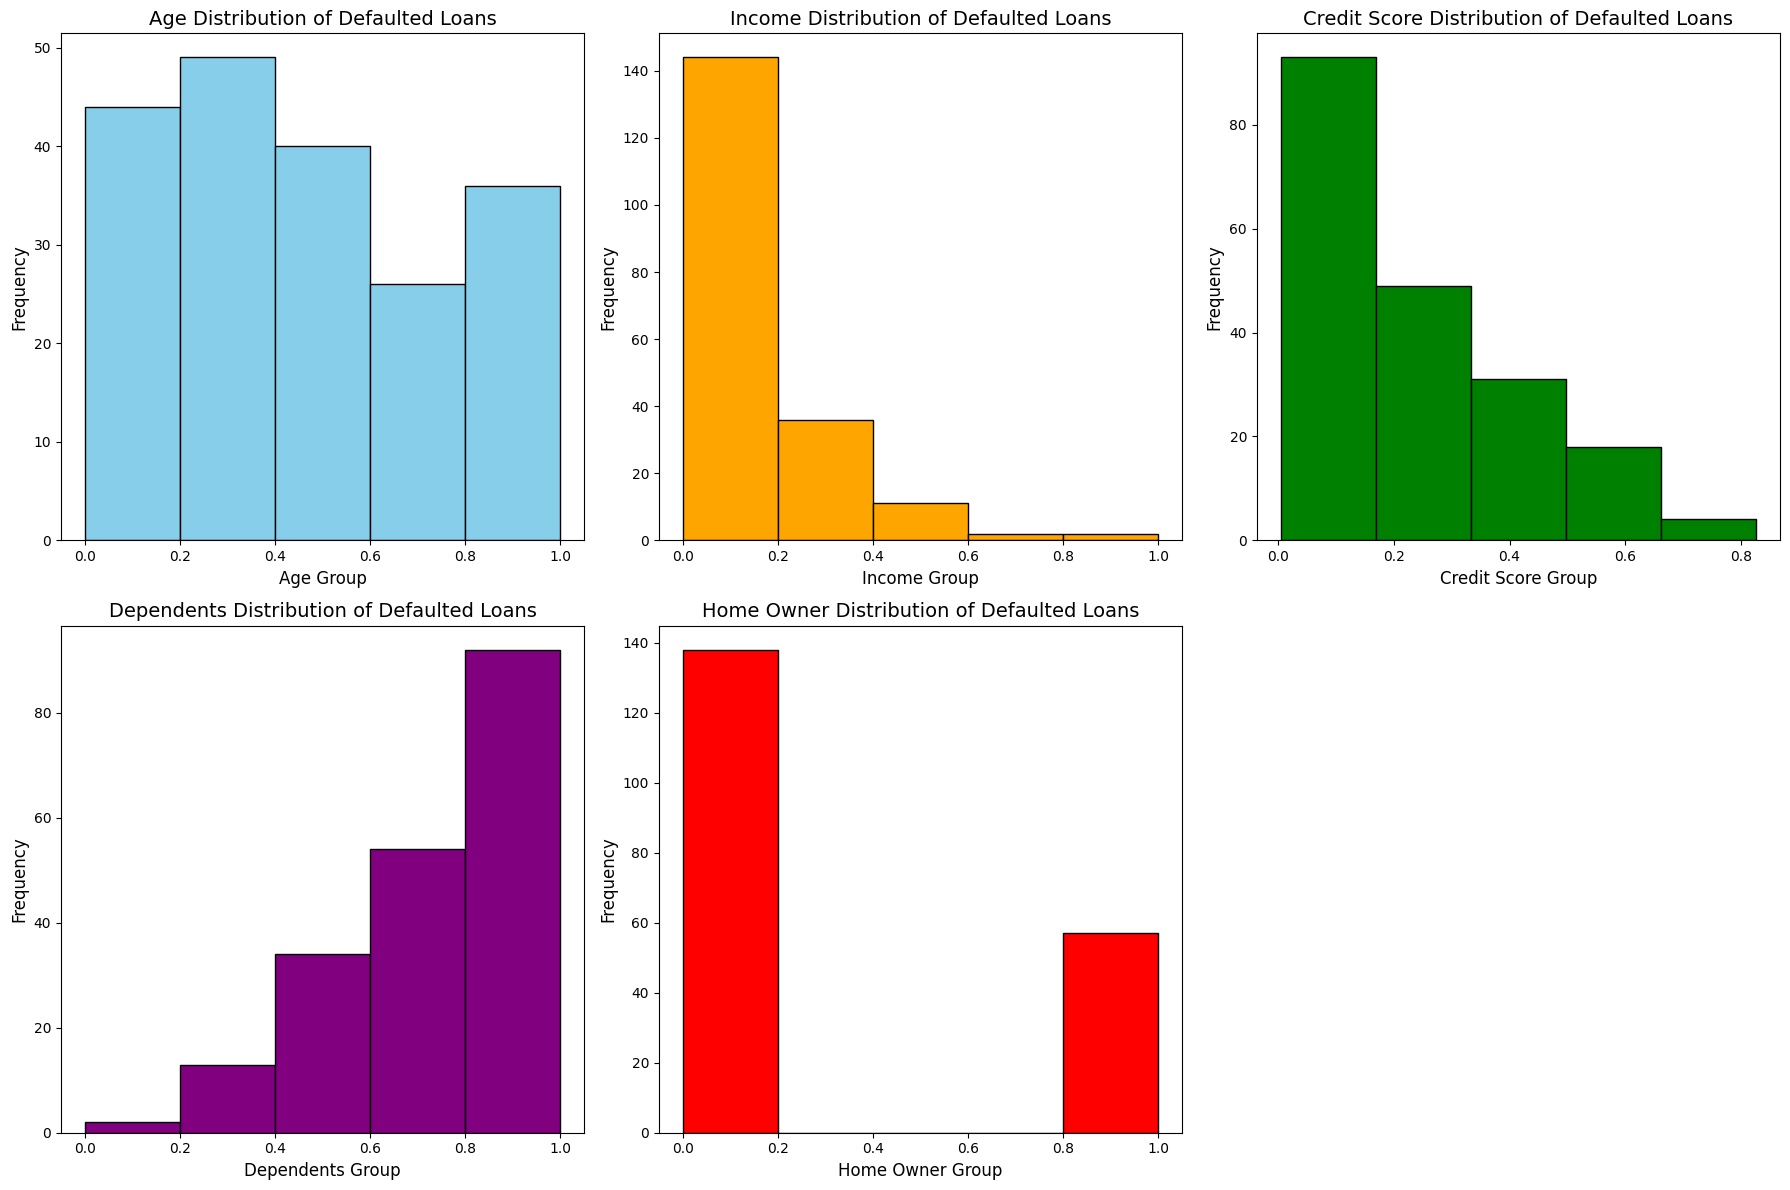

In [150]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out the rows where loan_default is 1 (defaulted loans)
defaulted_data = data_cleaned[data_cleaned['loan_default'] == 1]

# Define the number of bins (5 groups)
bins = 5

# Plotting the distribution for age
plt.figure(figsize=(18, 12))

# Age distribution
plt.subplot(2, 3, 1)
plt.hist(defaulted_data['age'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Defaulted Loans', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Income distribution
plt.subplot(2, 3, 2)
plt.hist(defaulted_data['income'], bins=bins, color='orange', edgecolor='black')
plt.title('Income Distribution of Defaulted Loans', fontsize=14)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Credit score distribution
plt.subplot(2, 3, 3)
plt.hist(defaulted_data['credit_score'], bins=bins, color='green', edgecolor='black')
plt.title('Credit Score Distribution of Defaulted Loans', fontsize=14)
plt.xlabel('Credit Score Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Dependents distribution
plt.subplot(2, 3, 4)
plt.hist(defaulted_data['dependents'], bins=bins, color='purple', edgecolor='black')
plt.title('Dependents Distribution of Defaulted Loans', fontsize=14)
plt.xlabel('Dependents Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Home owner distribution
plt.subplot(2, 3, 5)
plt.hist(defaulted_data['home_owner'], bins=bins, color='red', edgecolor='black')
plt.title('Home Owner Distribution of Defaulted Loans', fontsize=14)
plt.xlabel('Home Owner Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust the layout for better readability
plt.tight_layout()
plt.show()


From the Data Summary of the Defaulted Loans we can find that:

1. The Age: distribution of age of defaulted loans is fairly even, which indicates that it might not be the important factor of default
2. The Income: Defaults are highly concentrated in the lowest income groups, indicating that this might be an important factor of default
    (But since the data contains more lower-income data points, so this might not be significant)
3. Credit Score: Defaults are highly concentrated in the groups with lowerst credit scores, indicatiing that it is also an important factor.
4. Dependents: More depfendents are associated with default, indicating it its an important factor
5. Home Owners: Non-home owners are more likely to default.

This summary is in line with the scatter plots above

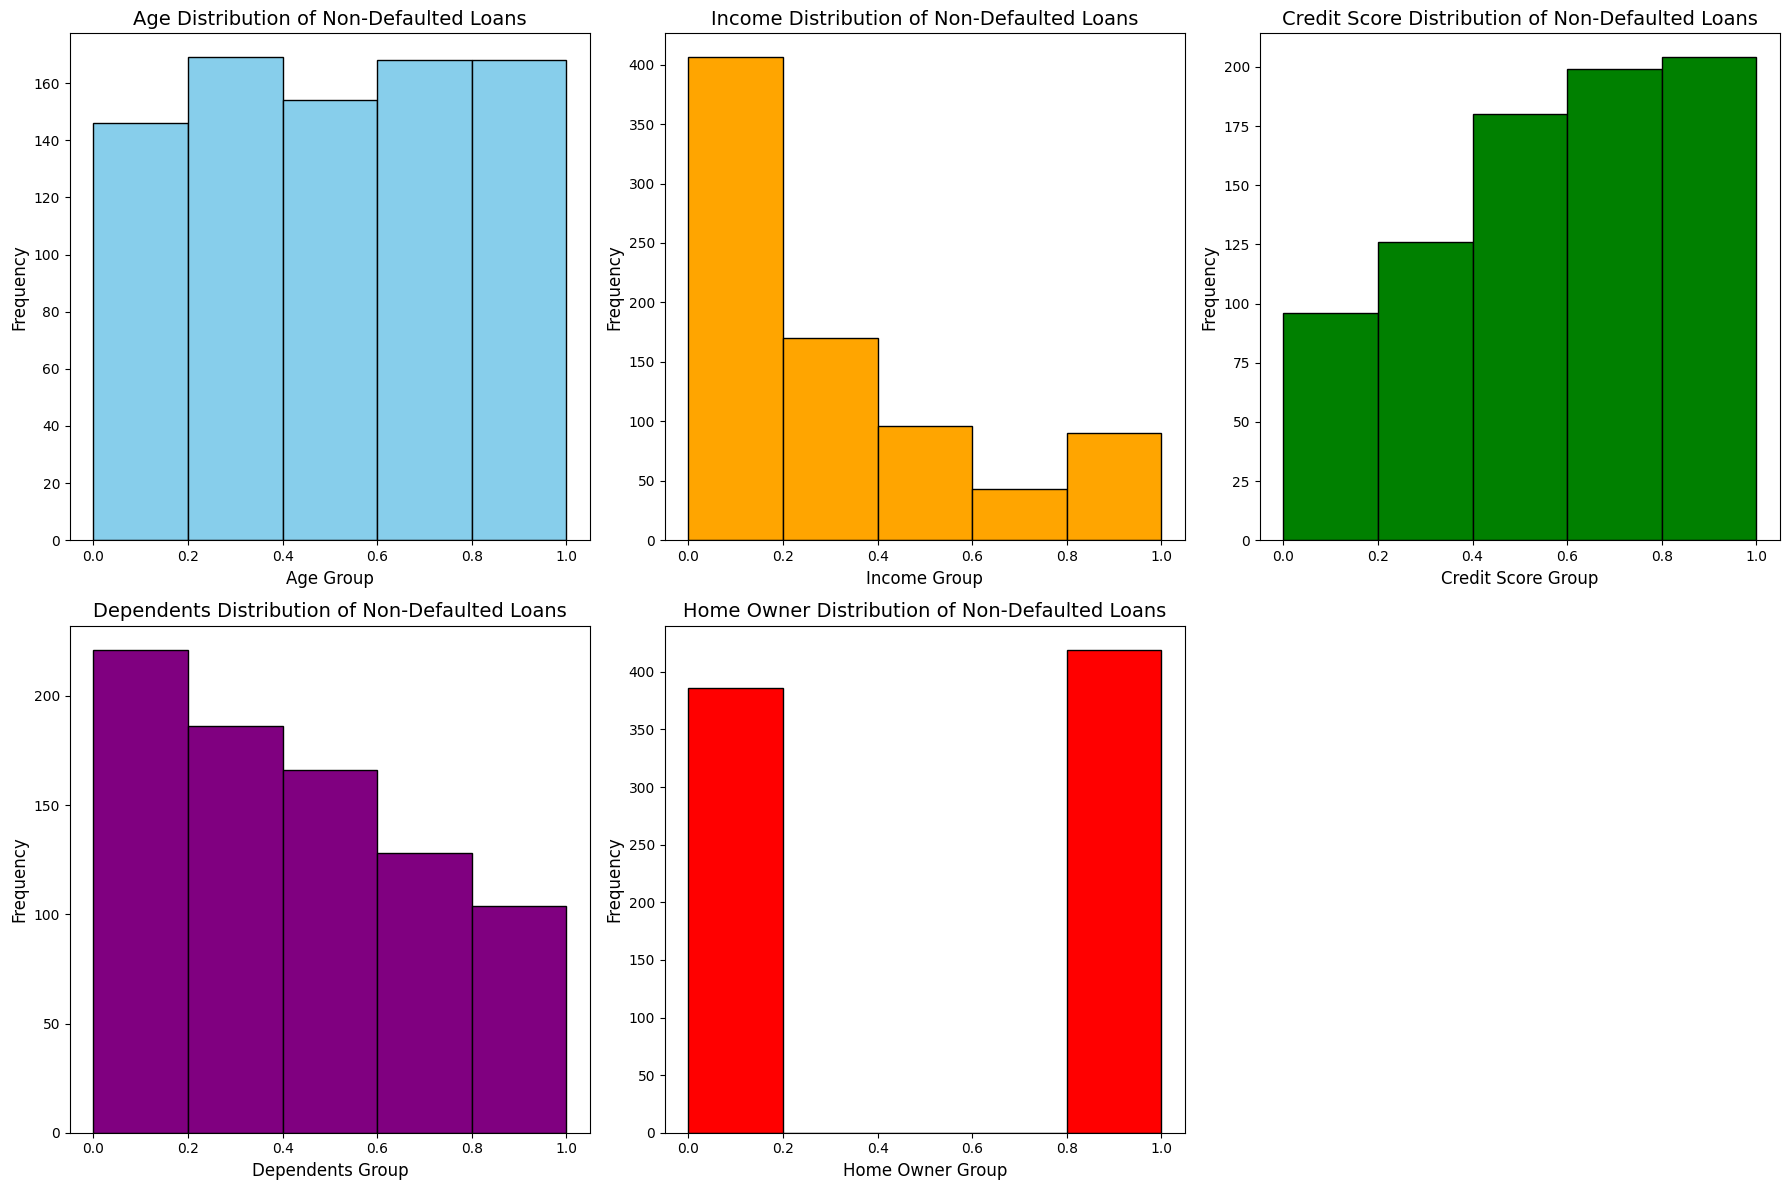

In [151]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out the rows where loan_default is 1 (defaulted loans)
defaulted_data = data_cleaned[data_cleaned['loan_default'] == 0]

# Define the number of bins (5 groups)
bins = 5

# Plotting the distribution for age
plt.figure(figsize=(18, 12))

# Age distribution
plt.subplot(2, 3, 1)
plt.hist(defaulted_data['age'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Non-Defaulted Loans', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Income distribution
plt.subplot(2, 3, 2)
plt.hist(defaulted_data['income'], bins=bins, color='orange', edgecolor='black')
plt.title('Income Distribution of Non-Defaulted Loans', fontsize=14)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Credit score distribution
plt.subplot(2, 3, 3)
plt.hist(defaulted_data['credit_score'], bins=bins, color='green', edgecolor='black')
plt.title('Credit Score Distribution of Non-Defaulted Loans', fontsize=14)
plt.xlabel('Credit Score Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Dependents distribution
plt.subplot(2, 3, 4)
plt.hist(defaulted_data['dependents'], bins=bins, color='purple', edgecolor='black')
plt.title('Dependents Distribution of Non-Defaulted Loans', fontsize=14)
plt.xlabel('Dependents Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Home owner distribution
plt.subplot(2, 3, 5)
plt.hist(defaulted_data['home_owner'], bins=bins, color='red', edgecolor='black')
plt.title('Home Owner Distribution of Non-Defaulted Loans', fontsize=14)
plt.xlabel('Home Owner Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust the layout for better readability
plt.tight_layout()
plt.show()


From the Data Summary of the Non-Defaulted Loans we can find that:

1. The Age: distribution of age of non-defaulted loans is fairly even, which indicates that it might not be the important factor of default
2. The Income: Non-Defaults are highly concentrated in the lowest income groups, which is the same with the summary of default loans
    (This is because the data contains more people with lower income)
3. Credit Score: Non-Defaults are highly concentrated in the groups with highest credit scores, indicatiing that it is also an important factor.
4. Dependents: Less depfendents are associated with non-default, indicating it its an important factor
5. Home Owners: distribution is more or less the same

This summary is in line with the scatter plots above

In [152]:
# Step 1: Separate data based on loan_default (1 = Default, 0 = No Default)
loan_default_1 = data_cleaned[data_cleaned['loan_default'] == 1]  # Default loans
loan_default_0 = data_cleaned[data_cleaned['loan_default'] == 0]  # Non-default loans

# Step 2: Calculate mean, median, and standard deviation for numeric features
numeric_columns = ['age', 'income', 'credit_score', 'dependents', 'home_owner', 'loan_default']

# Mean, median, and standard deviation for loan_default = 1
mean_1 = loan_default_1[numeric_columns].mean()
median_1 = loan_default_1[numeric_columns].median()
std_1 = loan_default_1[numeric_columns].std()

# Mean, median, and standard deviation for loan_default = 0
mean_0 = loan_default_0[numeric_columns].mean()
median_0 = loan_default_0[numeric_columns].median()
std_0 = loan_default_0[numeric_columns].std()

# Display results
print("Statistics for loan_default = 1 (Defaulted Loans):")
print(pd.DataFrame({'Mean': mean_1, 'Median': median_1, 'Standard Deviation': std_1}))

print("\nStatistics for loan_default = 0 (Non-Defaulted Loans):")
print(pd.DataFrame({'Mean': mean_0, 'Median': median_0, 'Standard Deviation': std_0}))


Statistics for loan_default = 1 (Defaulted Loans):
                  Mean    Median  Standard Deviation
age           0.458922  0.428571            0.292445
income        0.152753  0.107504            0.172552
credit_score  0.236243  0.187614            0.184576
dependents    0.783333  0.750000            0.249053
home_owner    0.292308  0.000000            0.455994
loan_default  1.000000  1.000000            0.000000

Statistics for loan_default = 0 (Non-Defaulted Loans):
                  Mean    Median  Standard Deviation
age           0.511269  0.510204            0.291925
income        0.305860  0.196660            0.297442
credit_score  0.576422  0.601093            0.270689
dependents    0.409317  0.250000            0.342393
home_owner    0.520497  1.000000            0.499890
loan_default  0.000000  0.000000            0.000000


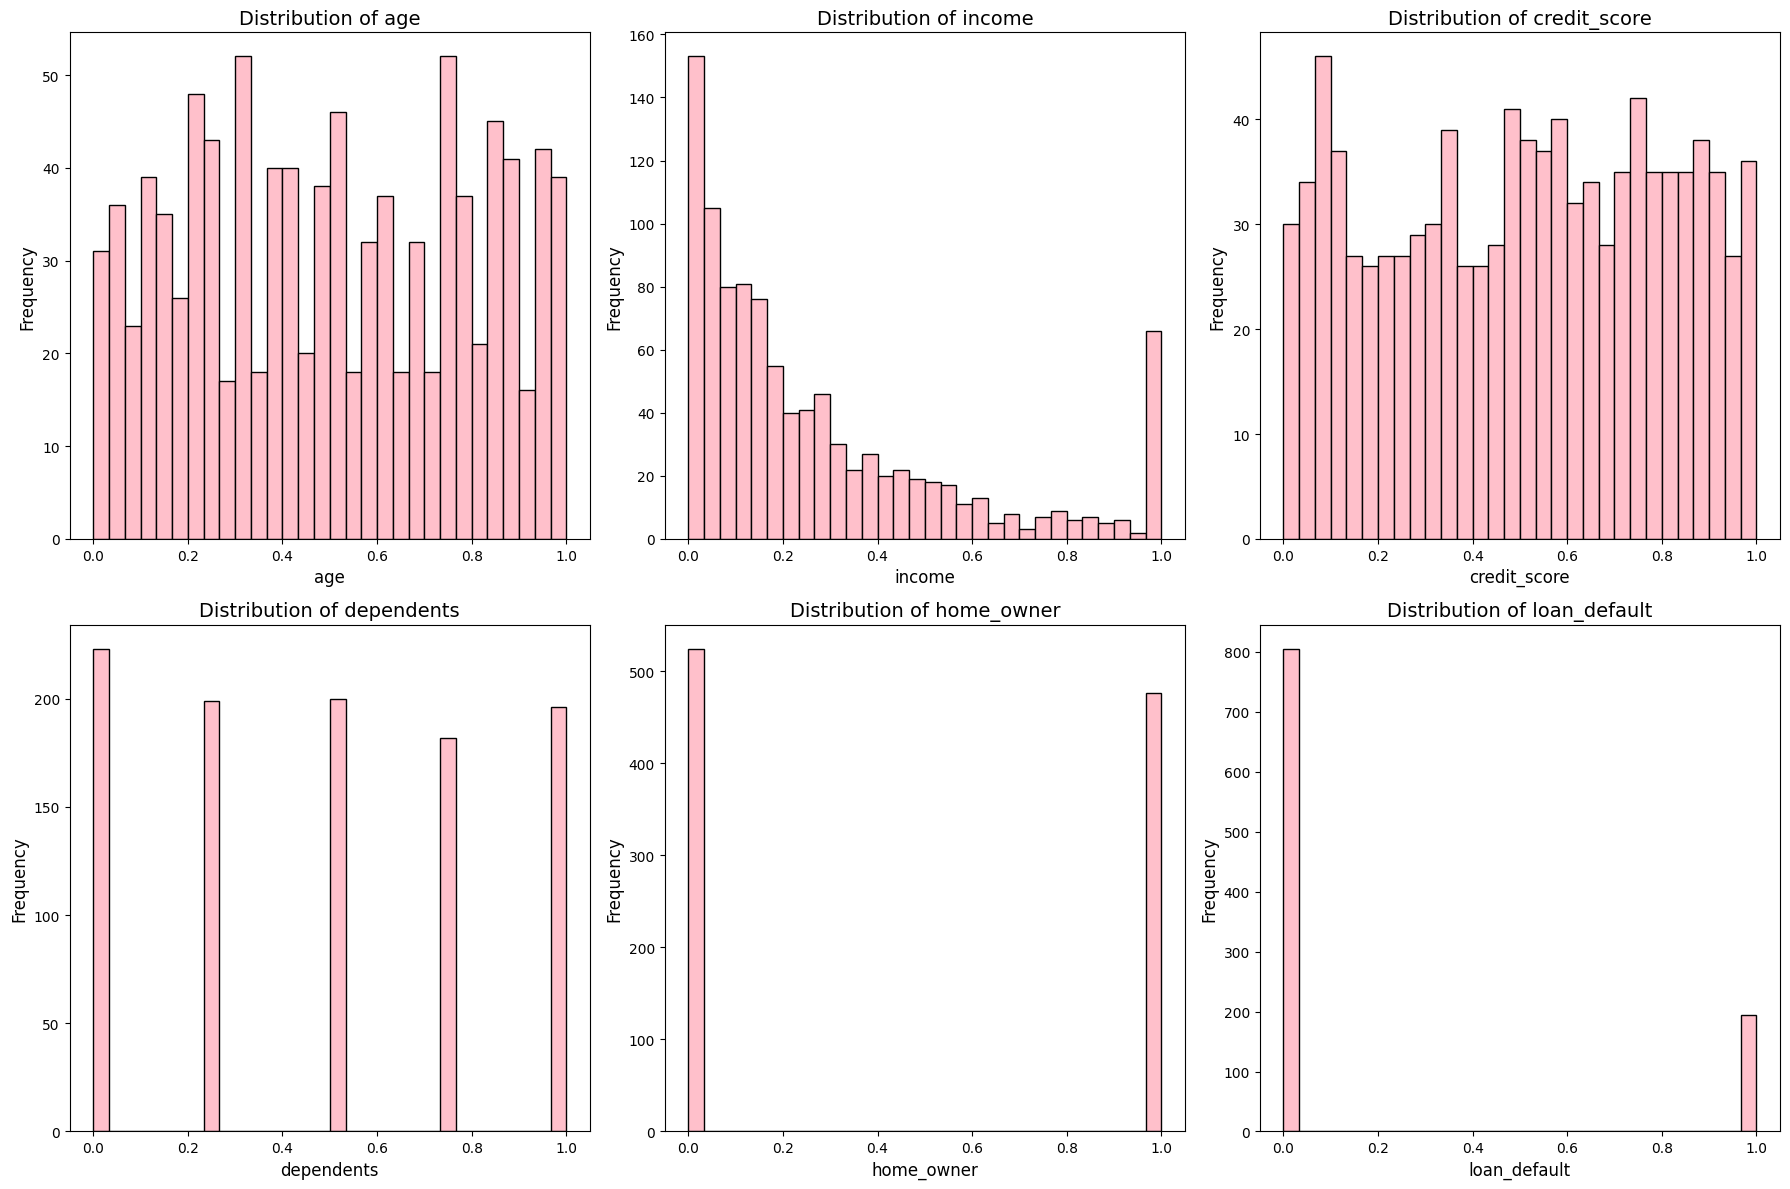

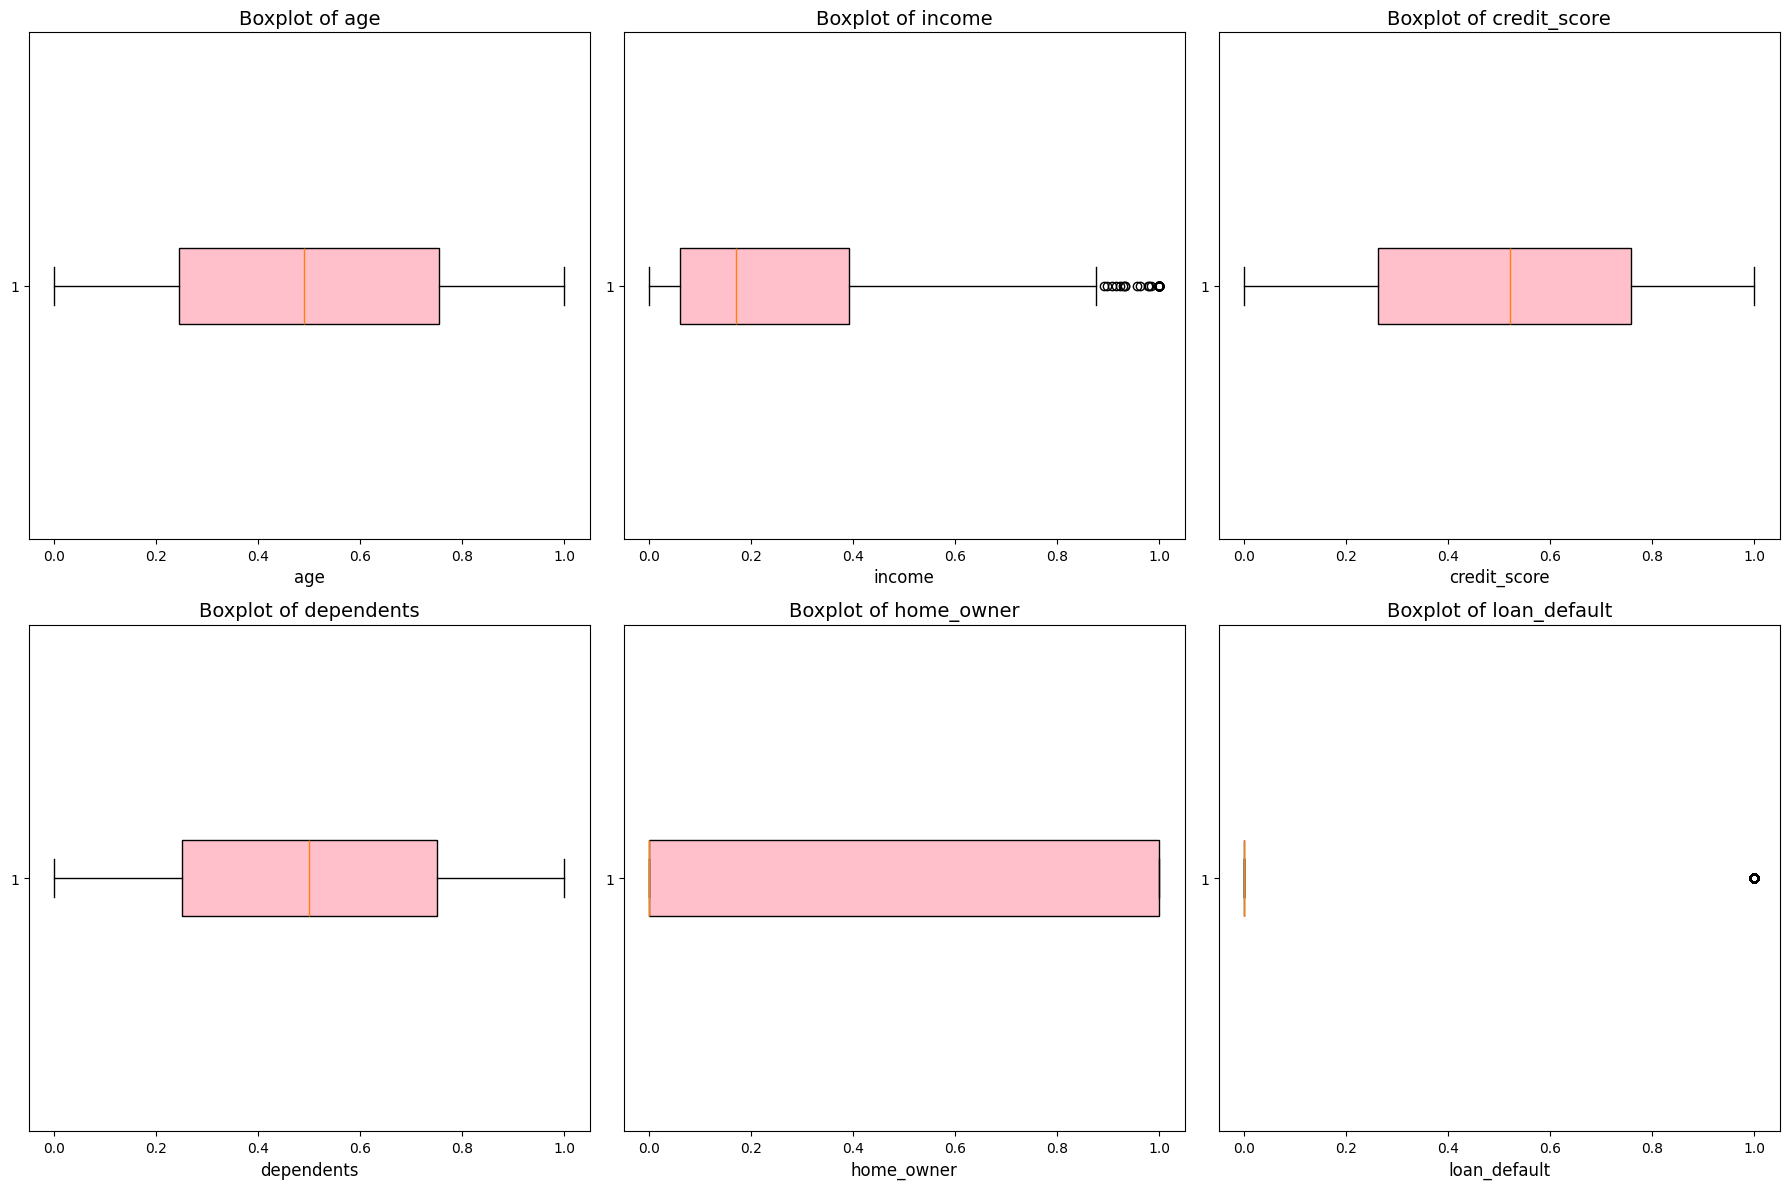

In [153]:
# Step 2: Check distribution and detect potential outliers using histograms and boxplots

# Plot histograms for numeric features
plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(data_cleaned[col], bins=30, color='pink', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Plot boxplots for numeric features to detect outliers
plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(data_cleaned[col], vert=False, patch_artist=True, boxprops=dict(facecolor="pink", color="black"))
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()


Data Summary of the Whole Dataset:

From the Distribution Plot and Boxplot :

1. Age: relatively even distribution, with no significant skew
2. Income: Skewed toward lower income values with a few outliers at hig-incomes (which explains what we found in the distribution of default and non-default loans in above cells)
3. Credit Scores: relatively uniform distribution, balanced spread
4. Dependents: Evenly distrubuted
5. Home Owners: Relatively even distribution

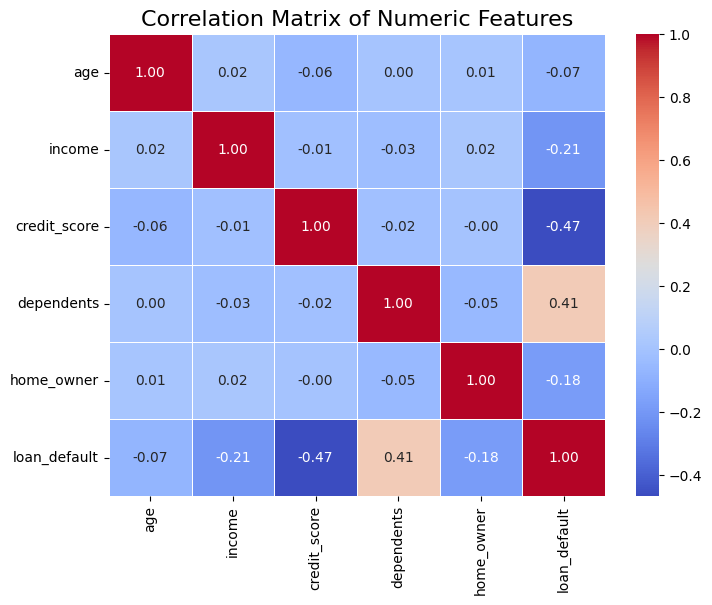

In [154]:
# Step 3: Check the correlation matrix for numeric features
correlation_matrix = data_cleaned[numeric_columns].corr()

# Plotting the correlation heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()


In [155]:
# Step 4: Outlier detection using IQR (Interquartile Range)
Q1 = data_cleaned[numeric_columns].quantile(0.25)
Q3 = data_cleaned[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
outliers = ((data_cleaned[numeric_columns] < (Q1 - 1.5 * IQR)) | (data_cleaned[numeric_columns] > (Q3 + 1.5 * IQR)))

# Display outliers
outliers_count = outliers.sum()
print(f"Outliers detected in each feature:\n{outliers_count}")


Outliers detected in each feature:
age               0
income           76
credit_score      0
dependents        0
home_owner        0
loan_default    195
dtype: int64


Part II Unsupervised Learning
---

* Heirarchical Clustering
* K-Mean Clustering

Heirarchical Clustering
----

* Tested K value [12, 24, 36]
* method ['complete', 'single']
* metric ['euclidean', 'chebyshev']

Hyper Parameter: 
---
* method='complete'
* metric= 'chebyshev'
* K = 12

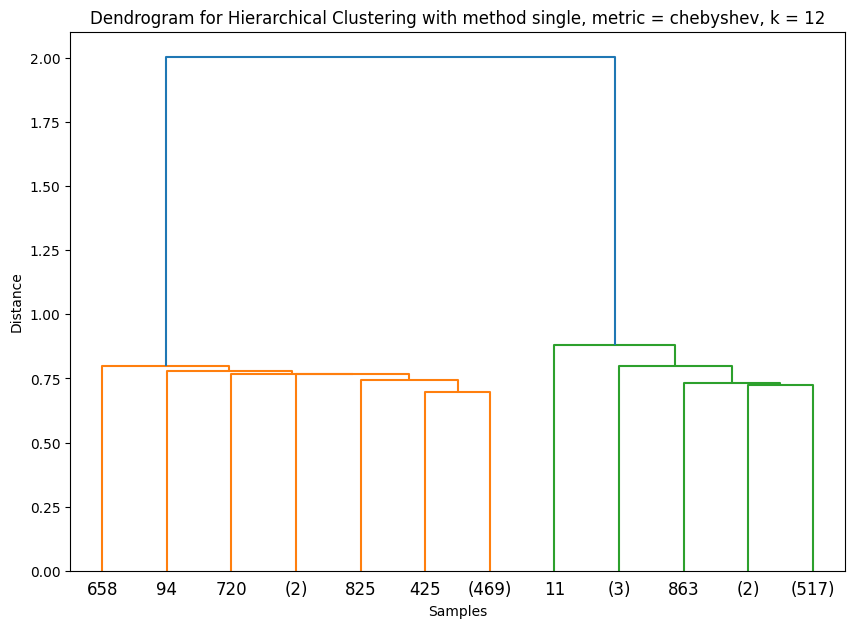

In [156]:
from sklearn.preprocessing import StandardScaler # type: ignore
from scipy.cluster.hierarchy import dendrogram, linkage # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[['age', 'income', 'credit_score', 'dependents', 'home_owner']])

# Step 2: Perform hierarchical clustering
Z = linkage(data_scaled, method='single', metric='chebyshev')

# Step 3: Plot dendrograms with different cut-off values
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering with method single, metric = chebyshev, k = 12')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


Hyper Parameter: 
---
* method='single'
* metric='euclideam'
* K = 12

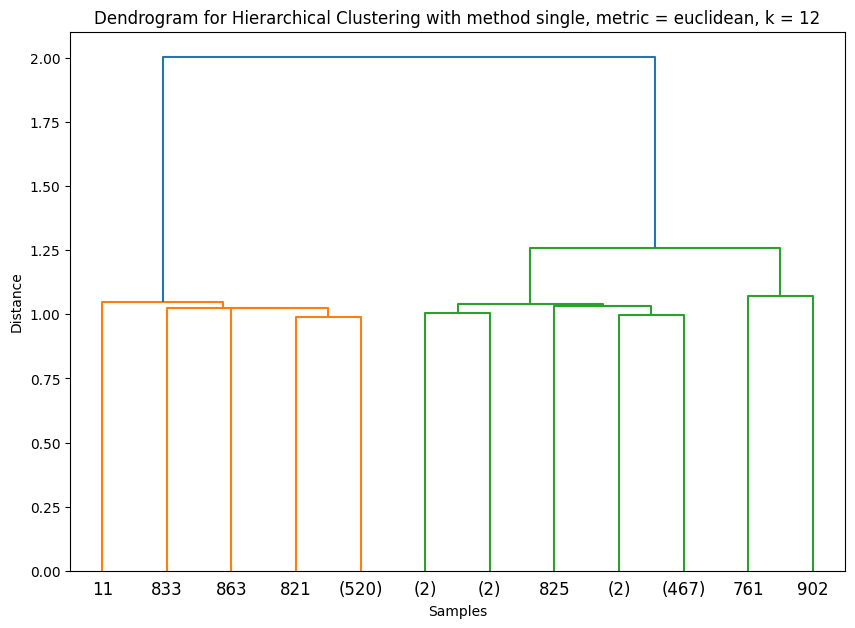

In [157]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[['age', 'income', 'credit_score', 'dependents', 'home_owner']])

# Step 2: Perform hierarchical clustering
Z = linkage(data_scaled, method='single', metric='euclidean')

# Step 3: Plot dendrograms with different cut-off values
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering with method single, metric = euclidean, k = 12')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


Hyper Parameter: 
---
* method= 'complete'
* metric='euclidean'
* K = 12

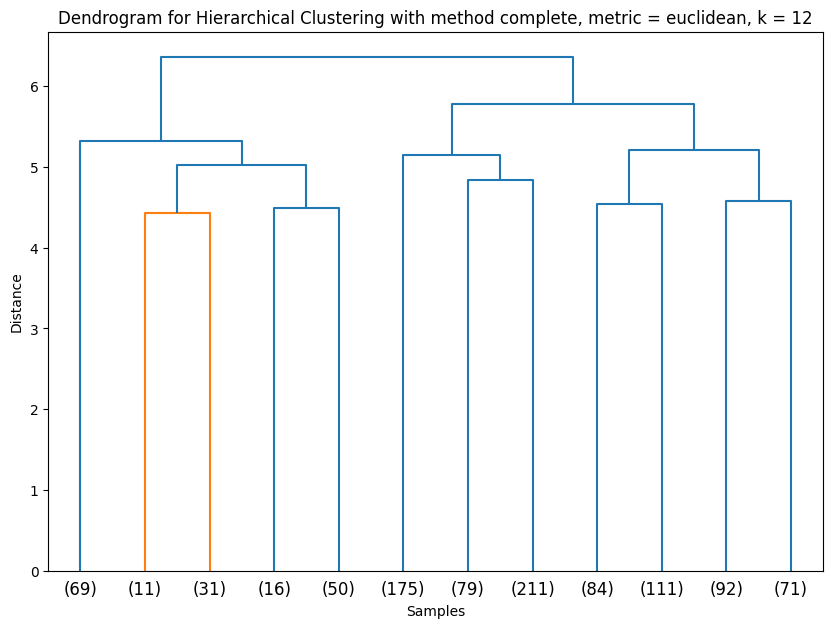

In [158]:
# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[['age', 'income', 'credit_score', 'dependents', 'home_owner']])

# Step 2: Perform hierarchical clustering
Z = linkage(data_scaled, method='complete', metric='euclidean')

# Step 3: Plot dendrograms with different cut-off values
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title('Dendrogram for Hierarchical Clustering with method complete, metric = euclidean, k = 12')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


At k = 12, the data forms 3 mother clusters:

* Cluster 1 (Orange): Samples 69, 11, 31, 16, 50,
* Cluster 2 (Green): Samples 175, 79, 211, 
* Cluster 3 (Red): Samples 84, 111, 92, 71


Hyper Parameter: 
---
* method= 'complete'
* metric='euclidean'
* K = 24

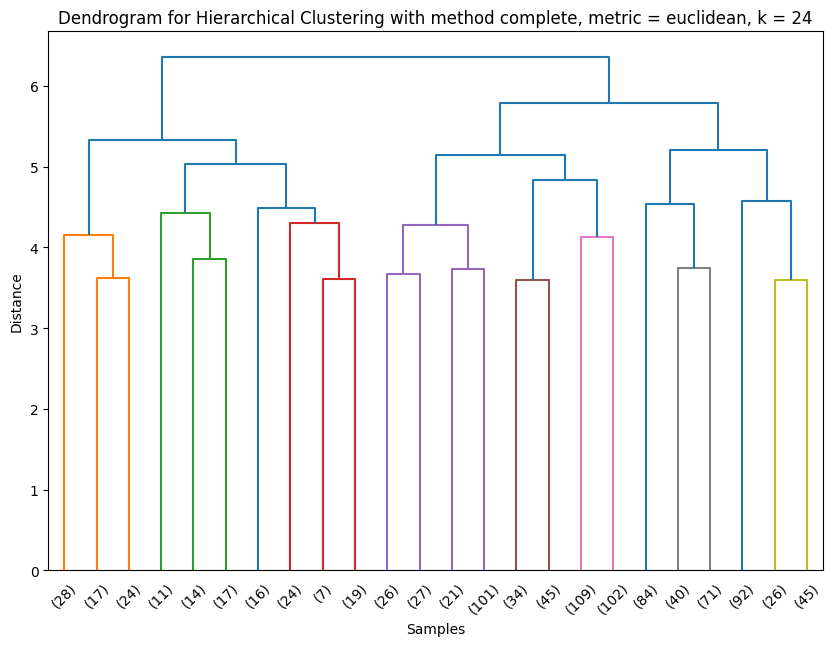

In [159]:
# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[['age', 'income', 'credit_score', 'dependents', 'home_owner']])

# Step 2: Perform hierarchical clustering
Z = linkage(data_scaled, method='complete', metric='euclidean')

# Step 3: Plot dendrograms with different cut-off values
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=24)
plt.title('Dendrogram for Hierarchical Clustering with method complete, metric = euclidean, k = 24')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


At k = 24, the data forms still 3 mother clusters, but each cluster has more sub clusters and grand-sub clusters(totally 24). Some sub-clusters stay the same, while others split into two smaller groups.

Some of the sub clusters were seperated into two, while other sub clusters remained the same.

* Cluster 1 (Orange): Samples 28, 17, 24, 11, 14, 17, 16, 24, 7, 19, 
* Cluster 2 (Green): Samples 26, 27, 21, 101, 34, 45, 109, 102, 
* Cluster 3 (Red): Samples 84, 40, 71, 92, 26, 45,


Hyper Parameter: 
---
* method='complete'
* metric='euclidean'
* K = 36

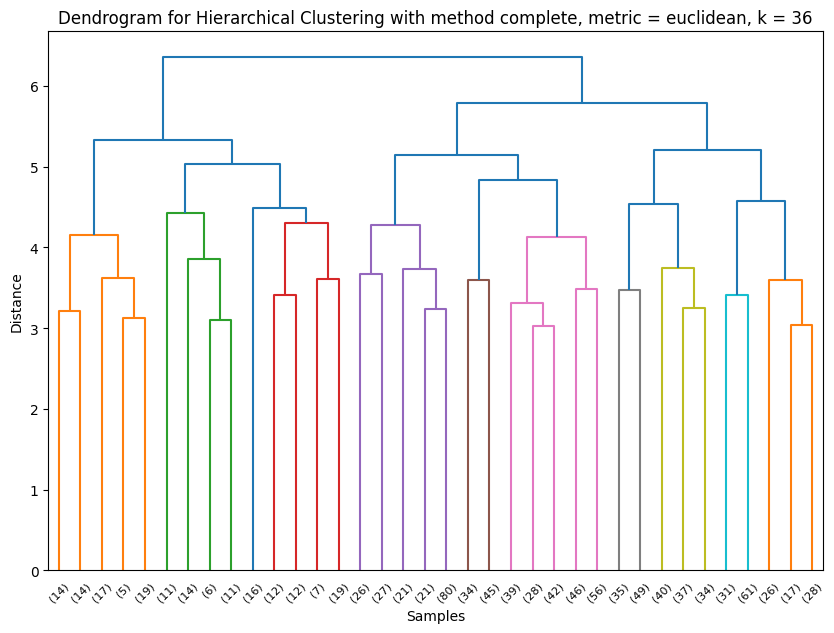

In [160]:
# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[['age', 'income', 'credit_score', 'dependents', 'home_owner']])

# Step 2: Perform hierarchical clustering
Z = linkage(data_scaled, method='complete', metric='euclidean')

# Step 3: Plot dendrograms with different cut-off values
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=36)
plt.title('Dendrogram for Hierarchical Clustering with method complete, metric = euclidean, k = 36')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


At k = 36, the data forms still 3 mother clusters, but each cluster has even more sub clusters and grand-sub clusters(totally 36). Some sub-clusters stay the same, while others split into two smaller groups.

* Cluster 1 (Orange): Samples 14, 14, 17, 5, 19, 11, 14, 6, 11, 16, 12, 12, 7, 19, 
* Cluster 2 (Green): Samples 26, 27, 21, 21, 80, 34, 45, 39, 28, 42, 46, 56,
* Cluster 3 (Red): Samples 35, 49, 40, 37, 34, 31, 61, 26, 17, 28,

K-Mean Clustering
---

* K_range = [2, 3, 5, 8, 9, 10]

Experimented with:
* Dependents vs Credit Score
* Income vs Credit Score
* All Features as Input Features

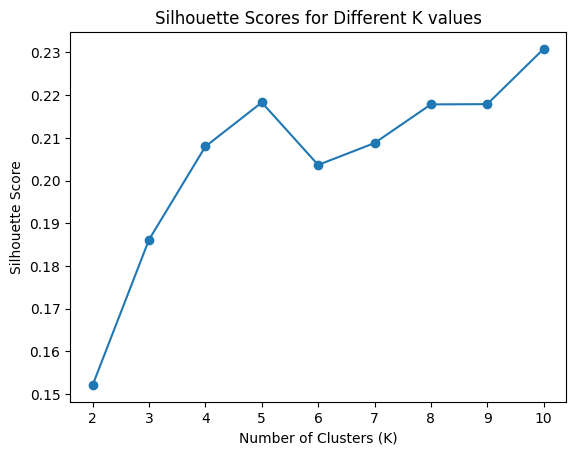

In [161]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[['age', 'income', 'credit_score', 'dependents', 'home_owner']])

# Step 2: Try different K values and calculate silhouette scores
sil_scores = []
K_range = range(2, 11)  # Testing K values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    sil_scores.append(score)

# Step 3: Plot the silhouette scores for different K values
plt.plot(K_range, sil_scores, marker='o')
plt.title('Silhouette Scores for Different K values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


The Silhouette Scores is highest when it is 10, and the second highest is 5.

So the following part I'll choose 2, 3, 5, 8, 9, 10 to test it.

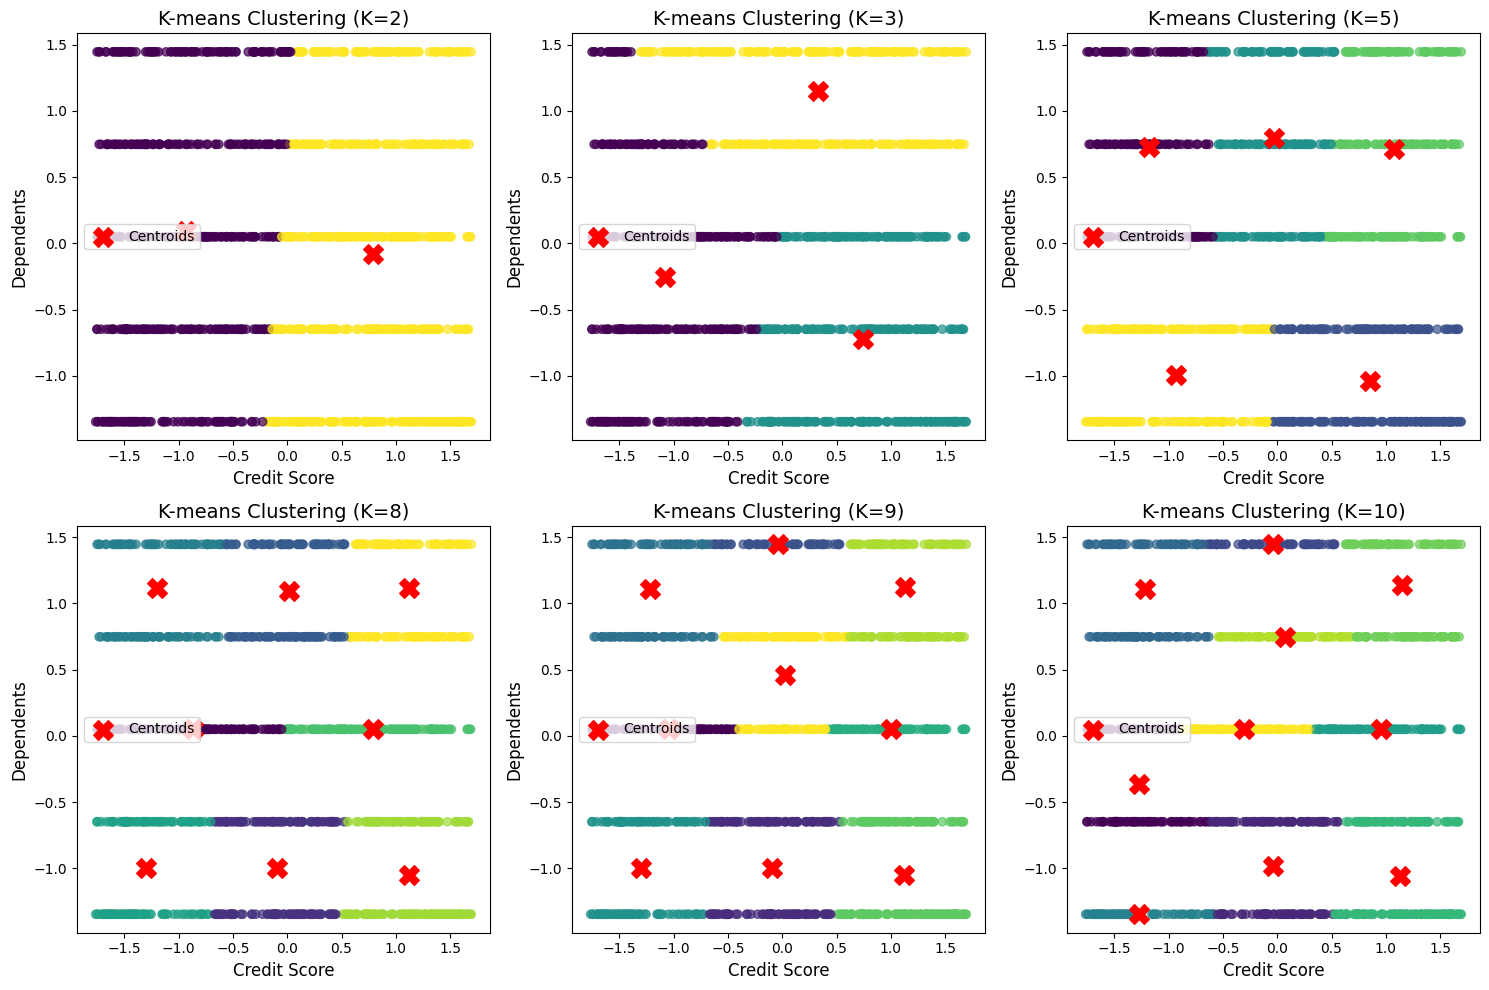

In [162]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Select the features 'credit_score' and 'dependents' for clustering
features = ['credit_score', 'dependents']
data_selected = data_cleaned[features]

# Step 2: Standardize the data (to ensure equal scale for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)  # Standardize the selected features

# Step 3: Apply K-means clustering for different K values (2 to 5 in this case)
K_range = [2, 3, 5, 8, 9, 10]  # Testing K values

# Step 4: Plot K-means clustering results for different K values
plt.figure(figsize=(15, 10))

for i, k in enumerate(K_range, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)  # Apply K-means clustering
    
    # Step 5: Plot the clustering result
    plt.subplot(2, 3, i)  # Create subplots for each K value
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
    
    # Plot the cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    # Add titles and labels
    plt.title(f'K-means Clustering (K={k})', fontsize=14)
    plt.xlabel('Credit Score', fontsize=12)
    plt.ylabel('Dependents', fontsize=12)
    plt.legend()

plt.tight_layout()  # Adjust layout for a better view
plt.show()



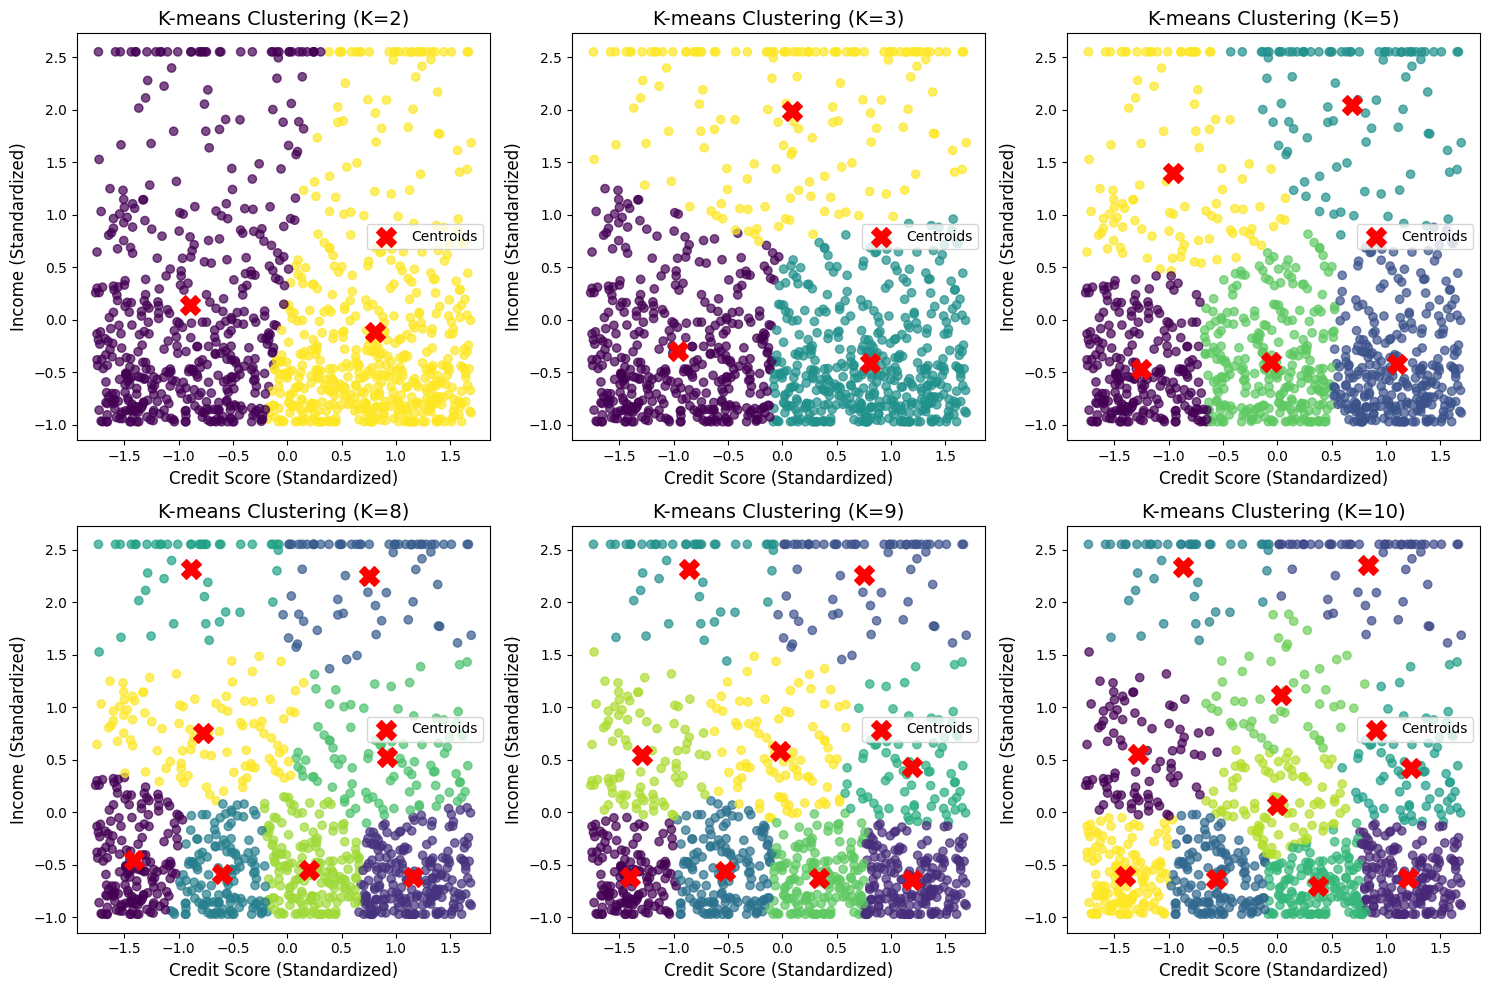

In [163]:
# Step 1: Select the features 'credit_score' and 'income' for clustering
features = ['credit_score', 'income']
data_selected = data_cleaned[features]

# Step 2: Standardize the data (to ensure equal scale for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)  # Standardize the selected features

# Step 3: Apply K-means clustering for different K values (2 to 5 in this case)
K_range = [2, 3, 5, 8, 9, 10]  # Testing K values

# Step 4: Plot K-means clustering results for different K values
plt.figure(figsize=(15, 10))

for i, k in enumerate(K_range, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)  # Apply K-means clustering
    
    # Step 5: Plot the clustering result
    plt.subplot(2, 3, i)  # Create subplots for each K value
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
    
    # Plot the cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    # Add titles and labels
    plt.title(f'K-means Clustering (K={k})', fontsize=14)
    plt.xlabel('Credit Score (Standardized)', fontsize=12)
    plt.ylabel('Income (Standardized)', fontsize=12)
    plt.legend()

plt.tight_layout()  # Adjust layout for a better view
plt.show()

K-Mean Clustering with all features
---

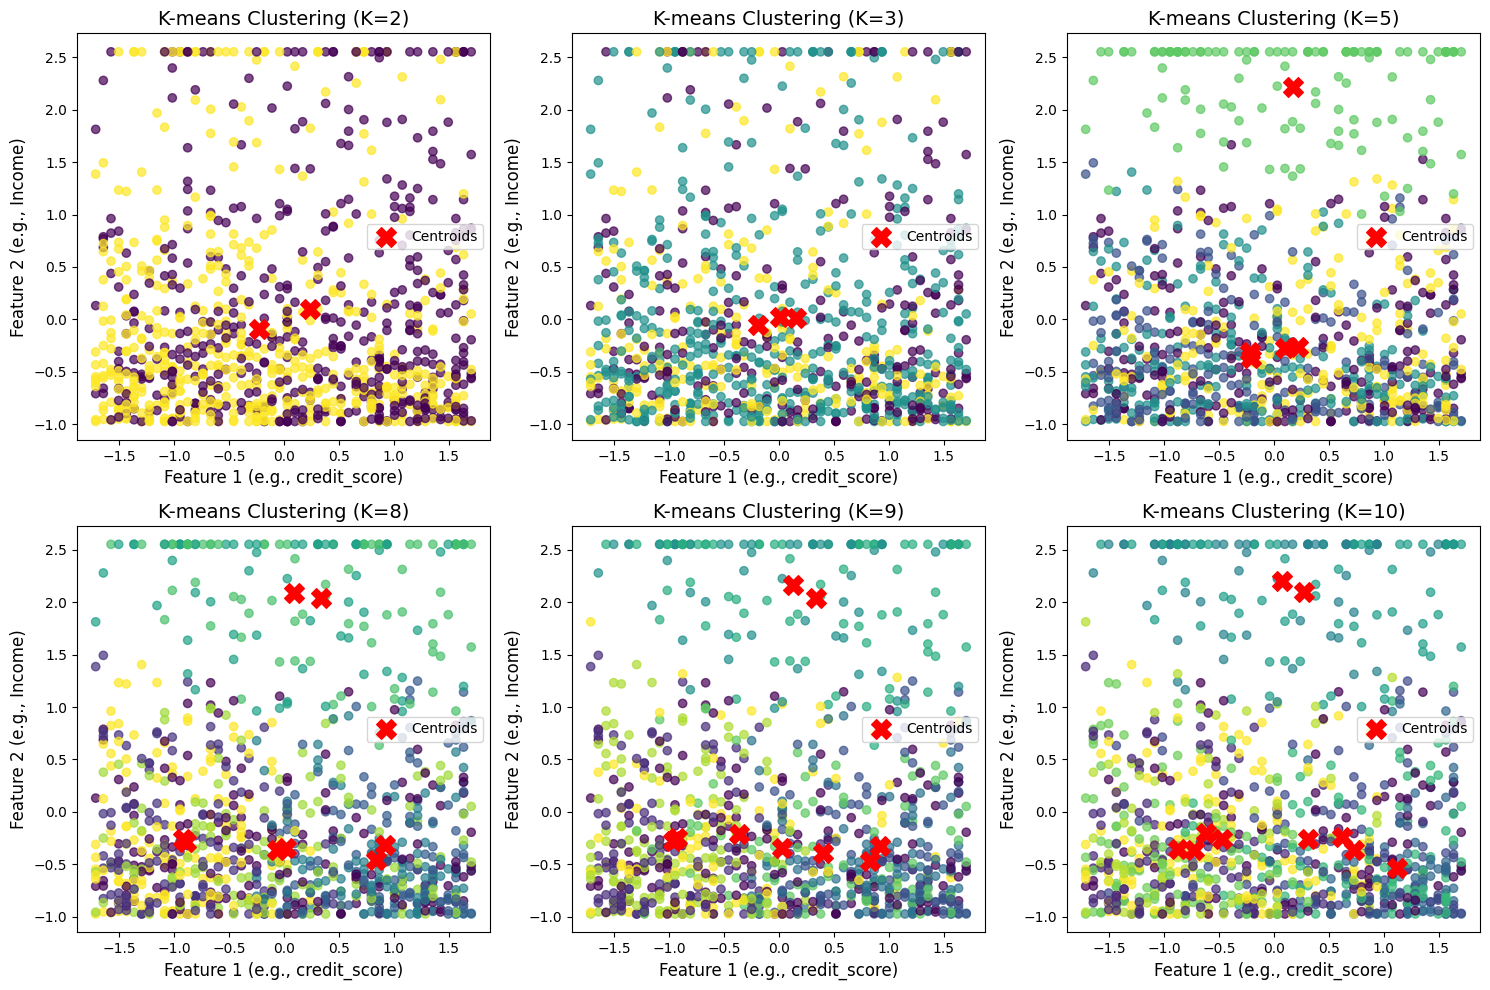

In [164]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Select features for clustering (excluding 'loan_default')
features = ['age', 'income', 'credit_score', 'dependents', 'home_owner']
data_selected = data_cleaned[features]

# Step 2: Standardize the data (to ensure equal scale for clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)  # Standardize the selected features

# Step 3: Apply K-means clustering for different K values (2 to 7 in this case)
K_range = [2, 3, 5, 8, 9, 10]  # Testing K values

# Step 4: Plot K-means clustering results for different K values
plt.figure(figsize=(15, 10))

for i, k in enumerate(K_range, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)  # Apply K-means clustering
    
    # Step 5: Plot the clustering result (2D projection of the first two features)
    plt.subplot(2, 3, i)  # Create subplots for each K value
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
    
    # Plot the cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    # Add titles and labels
    plt.title(f'K-means Clustering (K={k})', fontsize=14)
    plt.xlabel('Feature 1 (e.g., credit_score)', fontsize=12)
    plt.ylabel('Feature 2 (e.g., Income)', fontsize=12)
    plt.legend()

plt.tight_layout()  # Adjust layout for a better view
plt.show()


From all the experiments above, I can see that:

1. The best features for clustering are: income, credit_score
2. When all features are put together, the clustering is not seperated (perhaps I should try 3D visualization.)

Part III Supervised Learning
---

* MLP
* Logistic Regression
* Decision Tree

MLP
---

* Tested with 2 features: 
    * income and credit scores as input features
    * Tested with all features as input features
    * Experimented with different learning rates (0.0001, 0.001, 0.01)
* Experimented with different numbers of neurons in each layer and later added more layers

In [165]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# File path to the dataset
file_path = r'Data/loan_default_prediction.csv'

# Load the data from the file
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data[['income', 'credit_score']]
y = data['loan_default']  # Target variable

# Print the first few rows to confirm successful loading
print("Data loaded successfully. First 5 rows:")
print(data.head())


Data loaded successfully. First 5 rows:
   age     income  credit_score  dependents  home_owner  loan_default
0   64  100000.00           583           3           0             0
1   45   16803.24           685           4           0             0
2   69   15418.51           498           2           0             0
3   63   11474.46           533           4           0             0
4   46   11536.00           454           0           1             0


In [166]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Count the occurrences of each value in the target variable for the training set
train_counts = pd.Series(y_train).value_counts()

# Count the occurrences of each value in the target variable for the testing set
test_counts = pd.Series(y_test).value_counts()

# Display the counts
print("Training Set Counts:")
print(train_counts)

print("\nTesting Set Counts:")
print(test_counts)


Training Set Counts:
loan_default
0    644
1    156
Name: count, dtype: int64

Testing Set Counts:
loan_default
0    161
1     39
Name: count, dtype: int64


In [167]:
from sklearn.neural_network import MLPClassifier # type: ignore

# Initialize the MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(32, 16),  # Two hidden layers with 32 and 16 neurons
                    activation='relu',           # Activation function for hidden layers
                    solver='adam',               # Optimizer
                    learning_rate_init=0.01,         # Learning Rate
                    max_iter=1000,               # Maximum number of iterations
                    random_state=42)

# Train the neural network
ann.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(32, 16), learning_rate_init=0.01,
              max_iter=1000, random_state=42)

In [168]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred_experiment_1 = ann.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       161
           1       0.68      0.54      0.60        39

    accuracy                           0.86       200
   macro avg       0.79      0.74      0.76       200
weighted avg       0.85      0.86      0.85       200


Confusion Matrix:
 [[151  10]
 [ 18  21]]

ROC-AUC Score: 0.9058767319636885


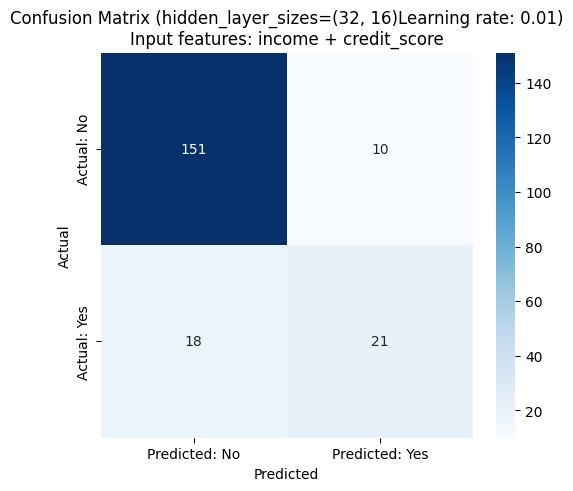


Confusion Matrix (hidden_layer_sizes=(32, 16)Learning rate: 0.01): 
[[151  10]
 [ 18  21]]


In [169]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix (hidden_layer_sizes=(32, 16)Learning rate: 0.01)\nInput features: income + credit_score')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (hidden_layer_sizes=(32, 16)Learning rate: 0.01): ")
print(cm)


In [170]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(32, 16),  # Two hidden layers with 32 and 16 neurons
                    activation='relu',           # Activation function for hidden layers
                    solver='adam',               # Optimizer
                    learning_rate_init=0.001,         # Learning Rate
                    max_iter=1000,               # Maximum number of iterations
                    random_state=42)

# Train the neural network
ann.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)

In [171]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred_experiment_1 = ann.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       161
           1       0.71      0.56      0.63        39

    accuracy                           0.87       200
   macro avg       0.80      0.75      0.77       200
weighted avg       0.86      0.87      0.86       200


Confusion Matrix:
 [[152   9]
 [ 17  22]]

ROC-AUC Score: 0.9065137760789934


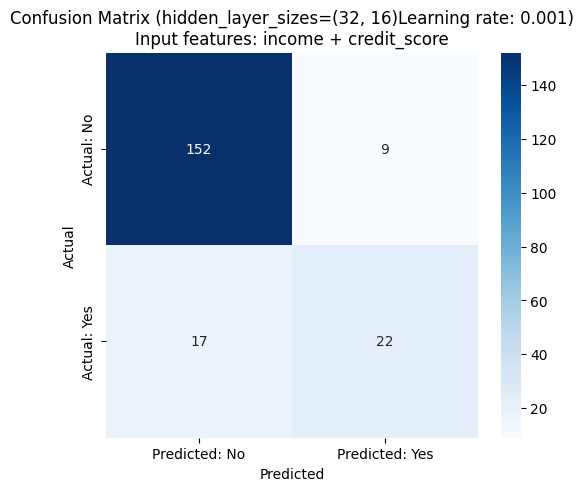


Confusion Matrix (hidden_layer_sizes=(32, 16)Learning rate: 0.001): 
[[152   9]
 [ 17  22]]


In [172]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix (hidden_layer_sizes=(32, 16)Learning rate: 0.001)\nInput features: income + credit_score')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (hidden_layer_sizes=(32, 16)Learning rate: 0.001): ")
print(cm)


In [173]:
from sklearn.neural_network import MLPClassifier # type: ignore

# Initialize the MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(32, 16),  # Two hidden layers with 32 and 16 neurons
                    activation='relu',           # Activation function for hidden layers
                    solver='adam',               # Optimizer
                    learning_rate_init=0.00001,         # Learning Rate
                    max_iter=1000,               # Maximum number of iterations
                    random_state=42)

# Train the neural network
ann.fit(X_train_scaled, y_train)


c:\SchoolWork\AI_For_Humanities_Second_Assignment\AI_Assignment_2_Loan_Default_Prediction\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 16), learning_rate_init=1e-05,
              max_iter=1000, random_state=42)

In [174]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred_experiment_1 = ann.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.805

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       161
           1       0.00      0.00      0.00        39

    accuracy                           0.81       200
   macro avg       0.40      0.50      0.45       200
weighted avg       0.65      0.81      0.72       200


Confusion Matrix:
 [[161   0]
 [ 39   0]]

ROC-AUC Score: 0.8913839783405


c:\SchoolWork\AI_For_Humanities_Second_Assignment\AI_Assignment_2_Loan_Default_Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\SchoolWork\AI_For_Humanities_Second_Assignment\AI_Assignment_2_Loan_Default_Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\SchoolWork\AI_For_Humanities_Second_Assignment\AI_Assignment_2_Loan_Default_Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set 

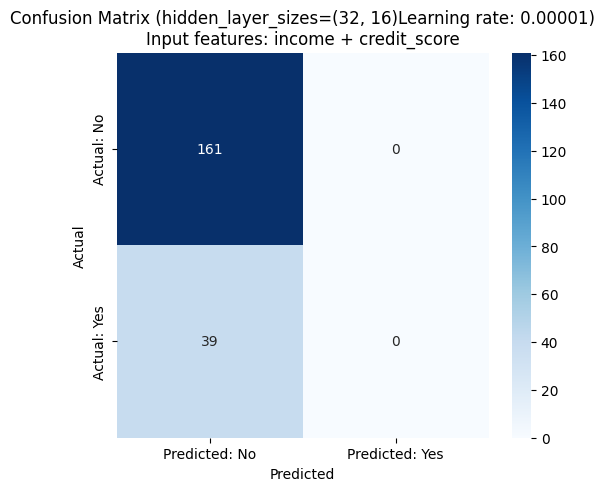


Confusion Matrix (hidden_layer_sizes=(32, 16)Learning rate: 0.00001): 
[[161   0]
 [ 39   0]]


In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix (hidden_layer_sizes=(32, 16)Learning rate: 0.00001)\nInput features: income + credit_score')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (hidden_layer_sizes=(32, 16)Learning rate: 0.00001): ")
print(cm)


From here we can see that:

1. Adjusting Learning rate, at least for MLP, would increase the accuracy, until a point where it hits diminishing marginal utility

MLP-All Features as input:
---

In [176]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# File path to the dataset
file_path = r'Data/loan_default_prediction.csv'

# Load the data from the file
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data[['age', 'income', 'credit_score', 'dependents', 'home_owner']]
y = data['loan_default']  # Target variable

# Print the first few rows to confirm successful loading
print("Data loaded successfully. First 5 rows:")
print(data.head())


Data loaded successfully. First 5 rows:
   age     income  credit_score  dependents  home_owner  loan_default
0   64  100000.00           583           3           0             0
1   45   16803.24           685           4           0             0
2   69   15418.51           498           2           0             0
3   63   11474.46           533           4           0             0
4   46   11536.00           454           0           1             0


In [177]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [178]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(32, 16),  # Two hidden layers with 32 and 16 neurons
                    activation='relu',           # Activation function for hidden layers
                    solver='adam',               # Optimizer
                    learning_rate_init=0.00001,         # Learning Rate
                    max_iter=1000,               # Maximum number of iterations
                    random_state=42)

# Train the neural network
ann.fit(X_train_scaled, y_train)


c:\SchoolWork\AI_For_Humanities_Second_Assignment\AI_Assignment_2_Loan_Default_Prediction\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(32, 16), learning_rate_init=1e-05,
              max_iter=1000, random_state=42)

In [179]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred_experiment_1 = ann.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       161
           1       0.93      0.69      0.79        39

    accuracy                           0.93       200
   macro avg       0.93      0.84      0.88       200
weighted avg       0.93      0.93      0.93       200


Confusion Matrix:
 [[159   2]
 [ 12  27]]

ROC-AUC Score: 0.9412326803631151


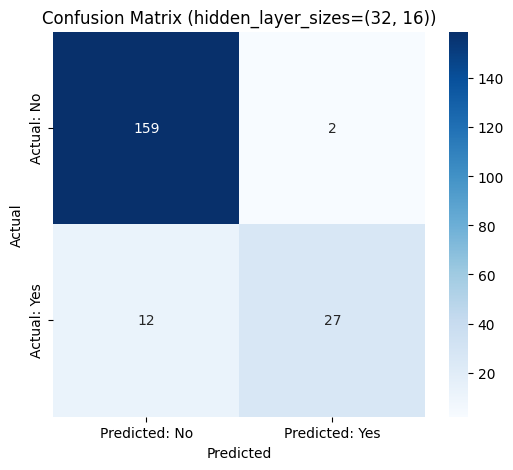


Confusion Matrix (hidden_layer_sizes=(32, 16)):
[[159   2]
 [ 12  27]]


In [180]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix (hidden_layer_sizes=(32, 16))')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (hidden_layer_sizes=(32, 16)):")
print(cm)


In [181]:
# Experiment with a different network structure
ann_experiment_1 = MLPClassifier(hidden_layer_sizes=(16, 8),  # Two hidden layers, adjusted the amount of neurons
                                activation='relu',
                                solver='adam',
                                learning_rate_init=0.00001,          # Learning rate
                                max_iter=1000,
                                random_state=42)

# Train the new network
ann_experiment_1.fit(X_train_scaled, y_train)

# Evaluate the new network
y_pred_experiment_1 = ann_experiment_1.predict(X_test_scaled)
print("Accuracy (Experiment):", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report (Experiment):\n", classification_report(y_test, y_pred_experiment_1))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy (Experiment): 0.64

Classification Report (Experiment):
               precision    recall  f1-score   support

           0       0.87      0.65      0.74       161
           1       0.30      0.62      0.40        39

    accuracy                           0.64       200
   macro avg       0.59      0.63      0.57       200
weighted avg       0.76      0.64      0.68       200


ROC-AUC Score: 0.9412326803631151


c:\SchoolWork\AI_For_Humanities_Second_Assignment\AI_Assignment_2_Loan_Default_Prediction\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


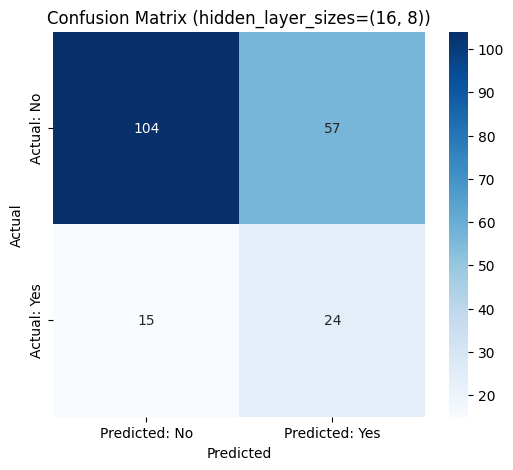


Confusion Matrix (hidden_layer_sizes=(16, 8)):
[[104  57]
 [ 15  24]]


In [182]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix (hidden_layer_sizes=(16, 8))')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (hidden_layer_sizes=(16, 8)):")
print(cm)


In [183]:
# Experiment with a different network structure
ann_experiment_1 = MLPClassifier(hidden_layer_sizes=(128, 64),  # Two hidden layers, adjusted the amount of neurons
                                activation='relu',
                                solver='adam',
                                learning_rate_init=0.00001,          # Learning rate
                                max_iter=1000,
                                random_state=42)

# Train the new network
ann_experiment_1.fit(X_train_scaled, y_train)

# Evaluate the new network
y_pred_experiment_1 = ann_experiment_1.predict(X_test_scaled)
print("Accuracy (Experiment):", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report (Experiment):\n", classification_report(y_test, y_pred_experiment_1))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy (Experiment): 0.93

Classification Report (Experiment):
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       161
           1       0.88      0.74      0.81        39

    accuracy                           0.93       200
   macro avg       0.91      0.86      0.88       200
weighted avg       0.93      0.93      0.93       200


ROC-AUC Score: 0.9412326803631151


c:\SchoolWork\AI_For_Humanities_Second_Assignment\AI_Assignment_2_Loan_Default_Prediction\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


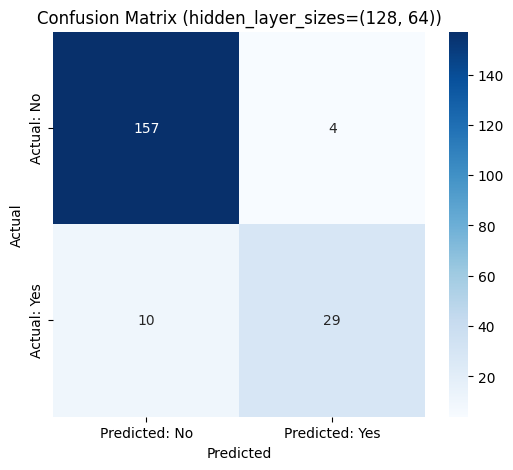


Confusion Matrix (hidden_layer_sizes=(128, 64)):
[[157   4]
 [ 10  29]]


In [184]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix (hidden_layer_sizes=(128, 64))')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (hidden_layer_sizes=(128, 64)):")
print(cm)


In [185]:
# Experiment with a different network structure
ann_experiment_1 = MLPClassifier(hidden_layer_sizes=(512, 256),  # Two hidden layers, adjusted the amount of neurons
                                activation='relu',
                                solver='adam',
                                learning_rate_init=0.00001,          # Learning rate
                                max_iter=1000,
                                random_state=42)

# Train the new network
ann_experiment_1.fit(X_train_scaled, y_train)

# Evaluate the new network
y_pred_experiment_1 = ann_experiment_1.predict(X_test_scaled)
print("Accuracy (Experiment):", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report (Experiment):\n", classification_report(y_test, y_pred_experiment_1))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy (Experiment): 0.935

Classification Report (Experiment):
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       161
           1       0.84      0.82      0.83        39

    accuracy                           0.94       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.93      0.94      0.93       200


ROC-AUC Score: 0.9412326803631151


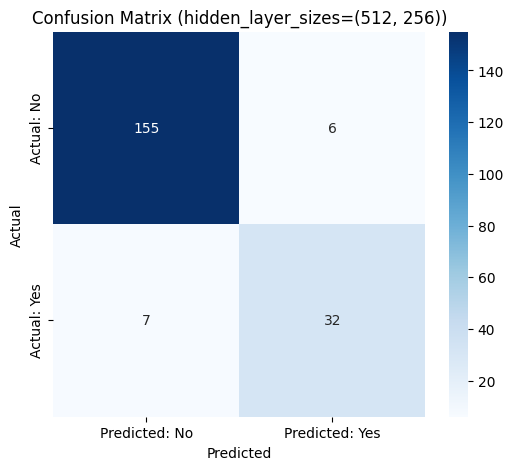


Confusion Matrix (hidden_layer_sizes=(512, 256)):
[[155   6]
 [  7  32]]


In [186]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix (hidden_layer_sizes=(512, 256))')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (hidden_layer_sizes=(512, 256)):")
print(cm)


You can see that:
1. Reducing the number of neurons would reduce the accuracy.
2. Increasing the number of neurons would increase the accuracy in certain range, until it hits diminishing marginal utility.
(At least that is what we can see from the test above. But in reality, whether it would cause overfitting or not would be a question)
3. Increasing the number of neurons would increase training time.


MLP: Testing with adding layers

In [187]:
# Experiment with a different network structure
ann_experiment_2 = MLPClassifier(hidden_layer_sizes=(64, 32, 16),  # Three hidden layers
                                activation='relu',
                                solver='adam',
                                learning_rate_init=0.00001,          # Learning rate
                                max_iter=1000,
                                random_state=42)

# Train the new network
ann_experiment_2.fit(X_train_scaled, y_train)

# Evaluate the new network
y_pred_experiment_2 = ann_experiment_2.predict(X_test_scaled)
print("Accuracy (Experiment):", accuracy_score(y_test, y_pred_experiment_2))
print("\nClassification Report (Experiment):\n", classification_report(y_test, y_pred_experiment_2))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy (Experiment): 0.915

Classification Report (Experiment):
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       161
           1       0.92      0.62      0.74        39

    accuracy                           0.92       200
   macro avg       0.92      0.80      0.84       200
weighted avg       0.92      0.92      0.91       200


ROC-AUC Score: 0.9412326803631151


c:\SchoolWork\AI_For_Humanities_Second_Assignment\AI_Assignment_2_Loan_Default_Prediction\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


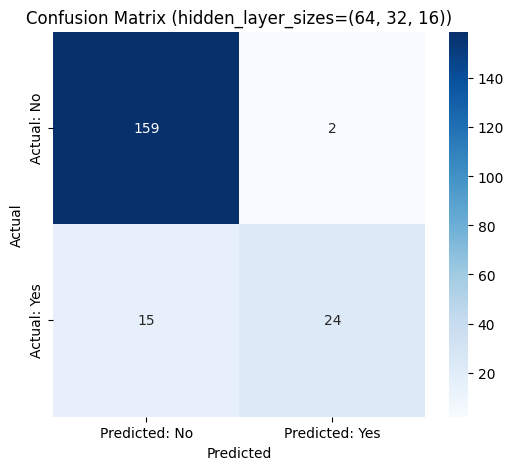


Confusion Matrix (hidden_layer_sizes=(64, 32, 16)):
[[159   2]
 [ 15  24]]


In [188]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_2)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix (hidden_layer_sizes=(64, 32, 16))')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (hidden_layer_sizes=(64, 32, 16)):")
print(cm)


In [189]:
# Experiment with a different network structure
ann_experiment_3 = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32, 16),  # Five hidden layers
                                activation='relu',
                                solver='adam',
                                learning_rate_init=0.00001,          # Learning rate
                                max_iter=1000,
                                random_state=42)

# Train the new network
ann_experiment_3.fit(X_train_scaled, y_train)

# Evaluate the new network
y_pred_experiment_3 = ann_experiment_3.predict(X_test_scaled)
print("Accuracy (Experiment):", accuracy_score(y_test, y_pred_experiment_3))
print("\nClassification Report (Experiment):\n", classification_report(y_test, y_pred_experiment_3))

# ROC-AUC Score
y_pred_proba = ann.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy (Experiment): 0.93

Classification Report (Experiment):
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       161
           1       0.82      0.82      0.82        39

    accuracy                           0.93       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.93      0.93      0.93       200


ROC-AUC Score: 0.9412326803631151


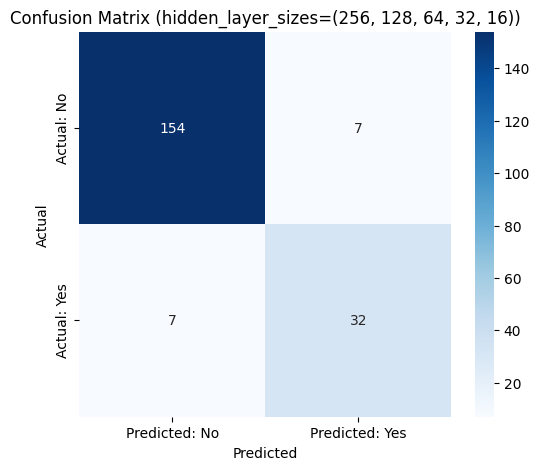


Confusion Matrix (hidden_layer_sizes=(256, 128, 64, 32, 16)):
[[154   7]
 [  7  32]]


In [190]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_3)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix (hidden_layer_sizes=(256, 128, 64, 32, 16))')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (hidden_layer_sizes=(256, 128, 64, 32, 16)):")
print(cm)


Logistic Regression:
---

1. Tested with different c values
2. All features are used for training and prediction

In [191]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
file_path = r'Data/loan_default_prediction.csv'
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data[['age', 'income', 'credit_score', 'dependents', 'home_owner']]
y = data['loan_default']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset info
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 800
Test set size: 200


In [192]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data has been standardized.")


Data has been standardized.


In [193]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg_experiment_0 = LogisticRegression(class_weight='balanced', C=0.0001, random_state=42)

# Train the model on the training data
log_reg_experiment_0.fit(X_train_scaled, y_train)

print("Logistic Regression model has been trained.")


Logistic Regression model has been trained.


In [194]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred_experiment_1 = log_reg_experiment_0.predict(X_test_scaled)
y_pred_proba = log_reg_experiment_0.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))

# Calculate ROC-AUC Score
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.885

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       161
           1       0.63      1.00      0.77        39

    accuracy                           0.89       200
   macro avg       0.81      0.93      0.85       200
weighted avg       0.93      0.89      0.89       200


Confusion Matrix:
 [[138  23]
 [  0  39]]

ROC-AUC Score: 0.9855072463768116


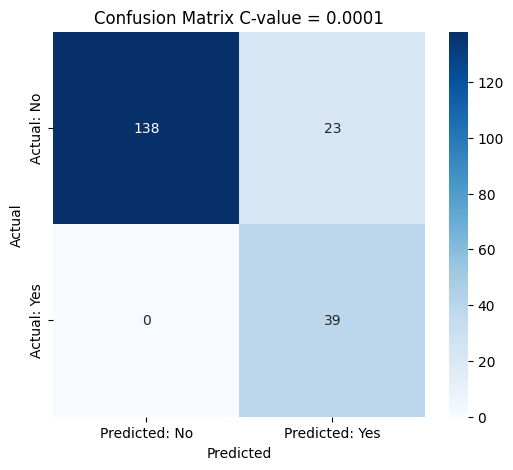


Confusion Matrix C-value = 0.0001:
[[138  23]
 [  0  39]]


In [195]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix C-value = 0.0001')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix C-value = 0.0001:")
print(cm)


In [196]:
# Initialize Logistic Regression with class_weight='balanced' and a different regularization strength
log_reg_experiment_1 = LogisticRegression(class_weight='balanced', C=0.001, random_state=42)

# Train the tuned model
log_reg_experiment_1.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_experiment_1 = log_reg_experiment_1.predict(X_test_scaled)
y_pred_proba_experiment_1 = log_reg_experiment_1.predict_proba(X_test_scaled)[:, 1]

# Evaluate the tuned model
print("Tuned Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_experiment_1))


Tuned Logistic Regression Results
Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93       161
           1       0.64      1.00      0.78        39

    accuracy                           0.89       200
   macro avg       0.82      0.93      0.85       200
weighted avg       0.93      0.89      0.90       200


Confusion Matrix:
 [[139  22]
 [  0  39]]

ROC-AUC Score: 0.9850294632903329


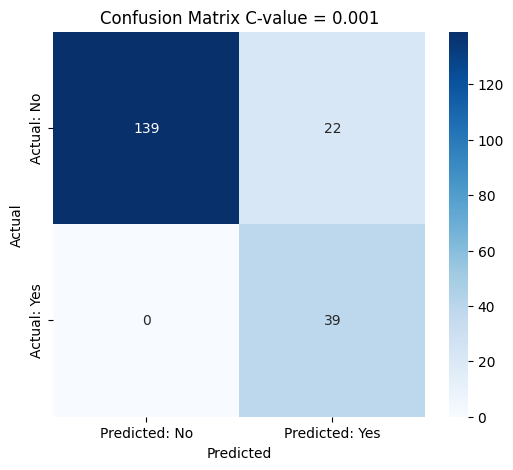


Confusion Matrix C-value = 0.001 
[[139  22]
 [  0  39]]


In [197]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix C-value = 0.001')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix C-value = 0.001 ")
print(cm)


In [198]:
# Initialize Logistic Regression with class_weight='balanced' and a different regularization strength
log_reg_experiment_2 = LogisticRegression(class_weight='balanced', C=0.01, random_state=42)

# Train the tuned model
log_reg_experiment_2.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_experiment_2 = log_reg_experiment_2.predict(X_test_scaled)
y_pred_proba_experiment_2 = log_reg_experiment_2.predict_proba(X_test_scaled)[:, 1]

# Evaluate the tuned model
print("Tuned Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_2))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_experiment_2))


Tuned Logistic Regression Results
Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       161
           1       0.72      0.97      0.83        39

    accuracy                           0.92       200
   macro avg       0.86      0.94      0.89       200
weighted avg       0.94      0.92      0.92       200


Confusion Matrix:
 [[146  15]
 [  1  38]]

ROC-AUC Score: 0.9847109412326804


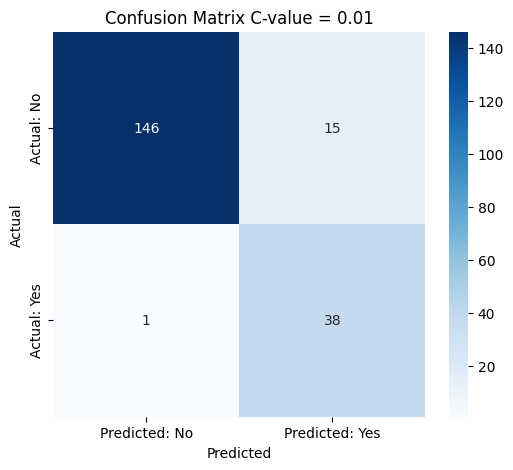


Confusion Matrix (C-value = 0,01:
[[146  15]
 [  1  38]]


In [199]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_2)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix C-value = 0.01')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (C-value = 0,01:")
print(cm)


In [200]:
# Initialize Logistic Regression with class_weight='balanced' and a different regularization strength
log_reg_experiment_3 = LogisticRegression(class_weight='balanced', C=0.1, random_state=42)

# Train the tuned model
log_reg_experiment_3.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_experiment_3 = log_reg_experiment_3.predict(X_test_scaled)
y_pred_proba_experiment_3 = log_reg_experiment_3.predict_proba(X_test_scaled)[:, 1]

# Evaluate the tuned model
print("Tuned Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_3))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_experiment_3))


Tuned Logistic Regression Results
Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       161
           1       0.73      0.97      0.84        39

    accuracy                           0.93       200
   macro avg       0.86      0.94      0.89       200
weighted avg       0.94      0.93      0.93       200


Confusion Matrix:
 [[147  14]
 [  1  38]]

ROC-AUC Score: 0.9853479853479854


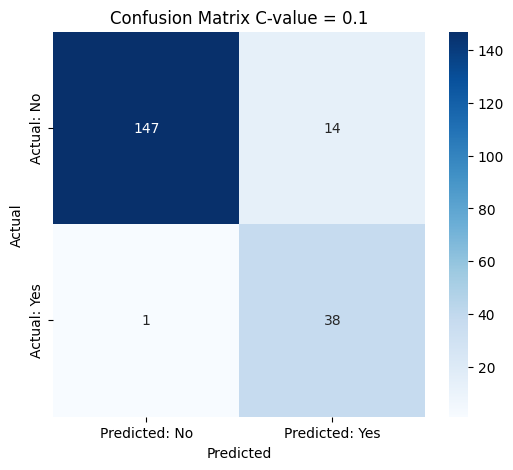


Confusion Matrix C-value = 0.1:
[[147  14]
 [  1  38]]


In [201]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_3)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix C-value = 0.1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix C-value = 0.1:")
print(cm)


In [202]:
# Initialize Logistic Regression with class_weight='balanced' and a different regularization strength
log_reg_experiment_4 = LogisticRegression(class_weight='balanced', C=1, random_state=42)

# Train the tuned model
log_reg_experiment_4.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_experiment_4 = log_reg_experiment_4.predict(X_test_scaled)
y_pred_proba_experiment_4 = log_reg_experiment_4.predict_proba(X_test_scaled)[:, 1]

# Evaluate the tuned model
print("Tuned Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_4))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_experiment_4))


Tuned Logistic Regression Results
Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       161
           1       0.75      0.97      0.84        39

    accuracy                           0.93       200
   macro avg       0.87      0.95      0.90       200
weighted avg       0.94      0.93      0.93       200


Confusion Matrix:
 [[148  13]
 [  1  38]]

ROC-AUC Score: 0.9858257684344641


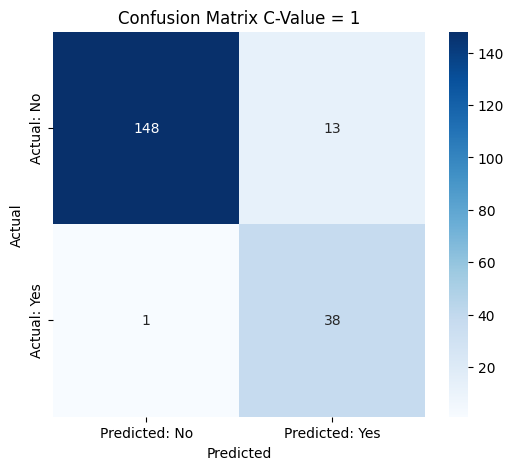


Confusion Matrix (Raw):
[[148  13]
 [  1  38]]


In [203]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_4)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix C-Value = 1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


From the above we can see that:

1. increasing the C-value would increase the accuracy first, until it hits the optimal point.
2. when over the optimal point, and the accuracy would reduce again

Decision Tree
---

Tested Hyperparameters:
1. 'max_depth': [5, 10, 20]
2. 'min_samples_split': [10, 20, 40]

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# 1. Data loading and splitting
file_path = r'Data/loan_default_prediction.csv'
data = pd.read_csv(file_path)

# Define features (X) and target (y)
X = data[['age', 'income', 'credit_score', 'dependents', 'home_owner']]
y = data['loan_default']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Data Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [205]:
# 3. Adjusting the hyperparameters
max_depth = 5  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 10  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_1 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_1))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90       161
           1       0.57      0.92      0.71        39

    accuracy                           0.85       200
   macro avg       0.77      0.88      0.80       200
weighted avg       0.90      0.85      0.86       200


Confusion Matrix:
 [[134  27]
 [  3  36]]

ROC-AUC Score: 0.932712215320911


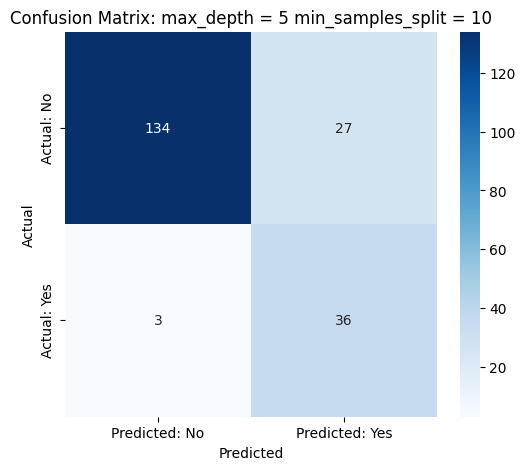


Confusion Matrix (Raw):
[[134  27]
 [  3  36]]


In [206]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_1)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix: max_depth = 5 min_samples_split = 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [207]:
# 3. Adjusting the hyperparameters
max_depth = 10  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 10  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_2 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_2))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       161
           1       0.63      0.79      0.70        39

    accuracy                           0.87       200
   macro avg       0.79      0.84      0.81       200
weighted avg       0.89      0.87      0.88       200


Confusion Matrix:
 [[143  18]
 [  8  31]]

ROC-AUC Score: 0.8739448956840261


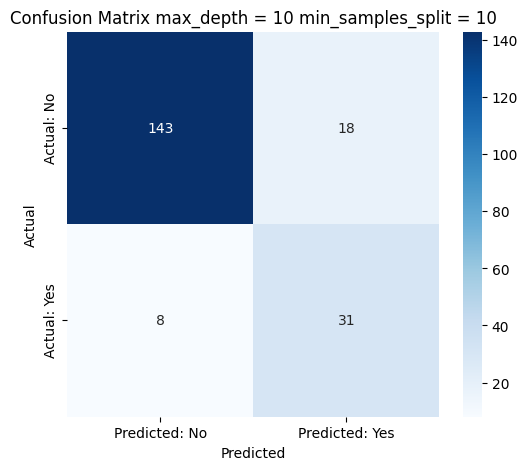


Confusion Matrix (Raw):
[[143  18]
 [  8  31]]


In [208]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_2)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix max_depth = 10 min_samples_split = 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [209]:
# 3. Adjusting the hyperparameters
max_depth = 20  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 10  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_3 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_3))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       161
           1       0.63      0.79      0.70        39

    accuracy                           0.87       200
   macro avg       0.79      0.84      0.81       200
weighted avg       0.89      0.87      0.88       200


Confusion Matrix:
 [[143  18]
 [  8  31]]

ROC-AUC Score: 0.8739448956840261


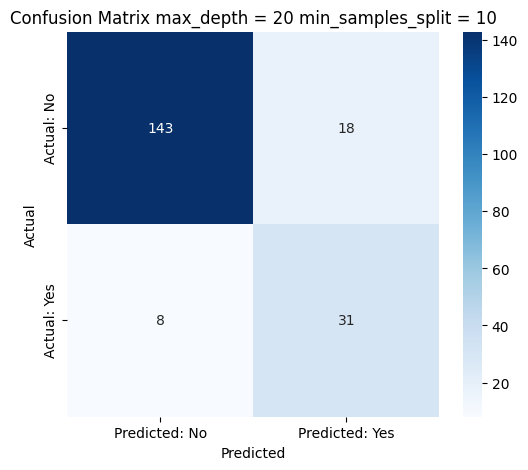


Confusion Matrix (Raw):
[[143  18]
 [  8  31]]


In [210]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_3)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix max_depth = 20 min_samples_split = 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


From above Experiment we can see that:

When the min_samples_split remains 10, 
increasing the max_depth would increase accuracy, until it hits diminishing marginal utility, and the accuracy would not increase


In [211]:
# 3. Adjusting the hyperparameters
max_depth = 10  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 20  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_4 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_4))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       161
           1       0.60      0.87      0.71        39

    accuracy                           0.86       200
   macro avg       0.78      0.86      0.81       200
weighted avg       0.89      0.86      0.87       200


Confusion Matrix:
 [[138  23]
 [  5  34]]

ROC-AUC Score: 0.9084249084249083


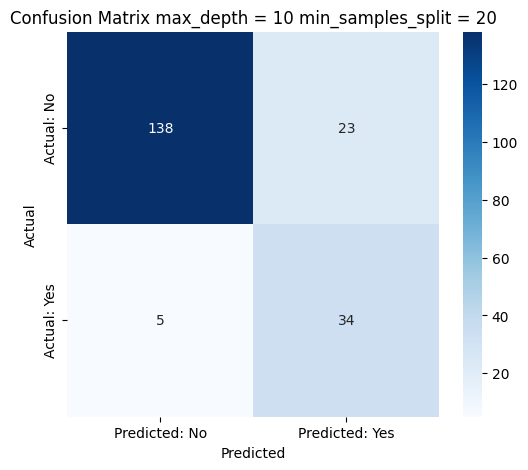


Confusion Matrix (Raw):
[[138  23]
 [  5  34]]


In [212]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_4)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix max_depth = 10 min_samples_split = 20')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [213]:
# 3. Adjusting the hyperparameters
max_depth = 10  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 40  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_5 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_5))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_5))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_5))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.835

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89       161
           1       0.55      0.92      0.69        39

    accuracy                           0.83       200
   macro avg       0.76      0.87      0.79       200
weighted avg       0.89      0.83      0.85       200


Confusion Matrix:
 [[131  30]
 [  3  36]]

ROC-AUC Score: 0.9306418219461697


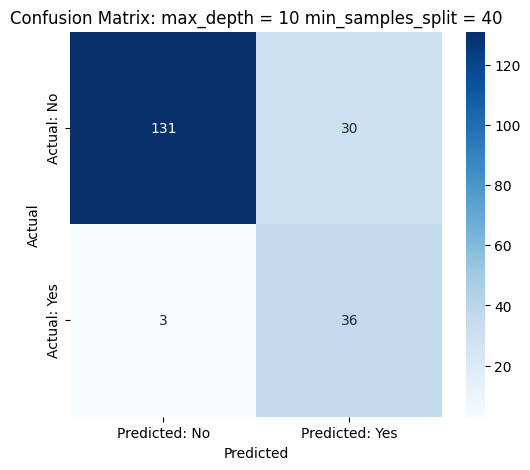


Confusion Matrix (Raw):
[[131  30]
 [  3  36]]


In [214]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_5)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix: max_depth = 10 min_samples_split = 40')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


In [215]:
# 3. Adjusting the hyperparameters
max_depth = 20  # Limiting the depth of the tree to avoid overfitting
min_samples_split = 40  # Minimum samples required to split a node
class_weight = 'balanced'  # Automatically adjust class weights to handle class imbalance

# 4. Building the Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    class_weight=class_weight,
    random_state=42
)

# Train the model
tree.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred_experiment_6 = tree.predict(X_test_scaled)
y_pred_proba = tree.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class

# Print the evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_experiment_6))
print("\nClassification Report:\n", classification_report(y_test, y_pred_experiment_6))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_experiment_6))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.835

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89       161
           1       0.55      0.92      0.69        39

    accuracy                           0.83       200
   macro avg       0.76      0.87      0.79       200
weighted avg       0.89      0.83      0.85       200


Confusion Matrix:
 [[131  30]
 [  3  36]]

ROC-AUC Score: 0.9306418219461697


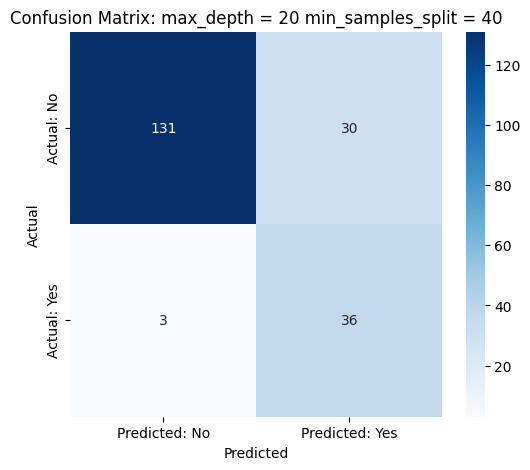


Confusion Matrix (Raw):
[[131  30]
 [  3  36]]


In [216]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_experiment_6)

# Plot confusion matrix using heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: No', 'Predicted: Yes'], yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix: max_depth = 20 min_samples_split = 40')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display confusion matrix in a raw format
print("\nConfusion Matrix (Raw):")
print(cm)


From above we can see that:

* When the max_depth remains unchanged, increasing the min_samples_split would reduce the accuracy
* When the min_samples_split remains unchanged, increasing the max_depth would increase the accuracy